# Flight Price Prediction
### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Machine Learning Steps:
    1.Define required libraries with which the model will optmised.
    2.Data Cleansing and Wrangling.
    3.Feature Engineering
    4.Data pre-processing
    5.Feature selection
    6.Split the data into training and testing
    7.Model selection
    8.Model validation
    9.Interpret the results

### Define required libraries with which the model will optmised.

In [1]:
# we will import the libraries at the time of required while we are progressing with our machine building 
# as of now we are importing the pandas library for the purpose of getting the data and load it into the DataFrame
import pandas as pd
import numpy as np

In [2]:
#loading the data 
trdata=pd.read_csv('Train_data.csv',delimiter='	')
tedata=pd.read_csv('Test_set.csv',delimiter='	')

In [3]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Observation:
    1.there are 11 fields on the data
    2.out of 11 fields 10 are string data type and the target column is int dtype
    3.maximum entries in each column are 10683
    4. no null values are present in the data

In [4]:
tedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [5]:
tedata.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

### Observation:
    1.10 fileds of future columns with 2671 maximum entries in each column
    2.no null columns are present in any of the field
    3.all are object type data 

#### Loading the data into DataFrame

In [6]:
tr=pd.DataFrame(trdata,), #trainig set loading
te=pd.DataFrame(tedata), #test set loading

In [7]:
trs=tr[0]
tes=te[0]

### EDA /Statistical and Visual Analysis

In [8]:
#Statistical Analysis
trs.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


### Observations:
    1.In Airline Column there are 12 types of airlines present with JetAirways as leading
    2.As per Date of Journey the data is colleted on 44 dates
    3.source data is from 5 with delhi as leading for travelling
    4.Destination is for 6 types with Cochin as most destination
    5.the flights are travelling in 128 Routes in which the most frequent use is del-bom-cok
    6.the data colleted contains 222 different times
    7.1343 different arrival times data was collected
    8.time of travel is of 368 types in which the most passengers travelling 2h 50m.
    9.Total stops are of 5 types in which single stop leads with 5625
    10.additional info column contains mostly no information in its entries.

In [9]:
tes.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


### Observation:
    this data also having the same observations as of the train data no much difference between them to point out

### Viusal or Graphical Analysis

#### Univarient Analysis

In [34]:
# importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
string='python'
for i in string:
    print(i[len(i)-2], end='')

python

In [12]:
trs.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


<AxesSubplot:>

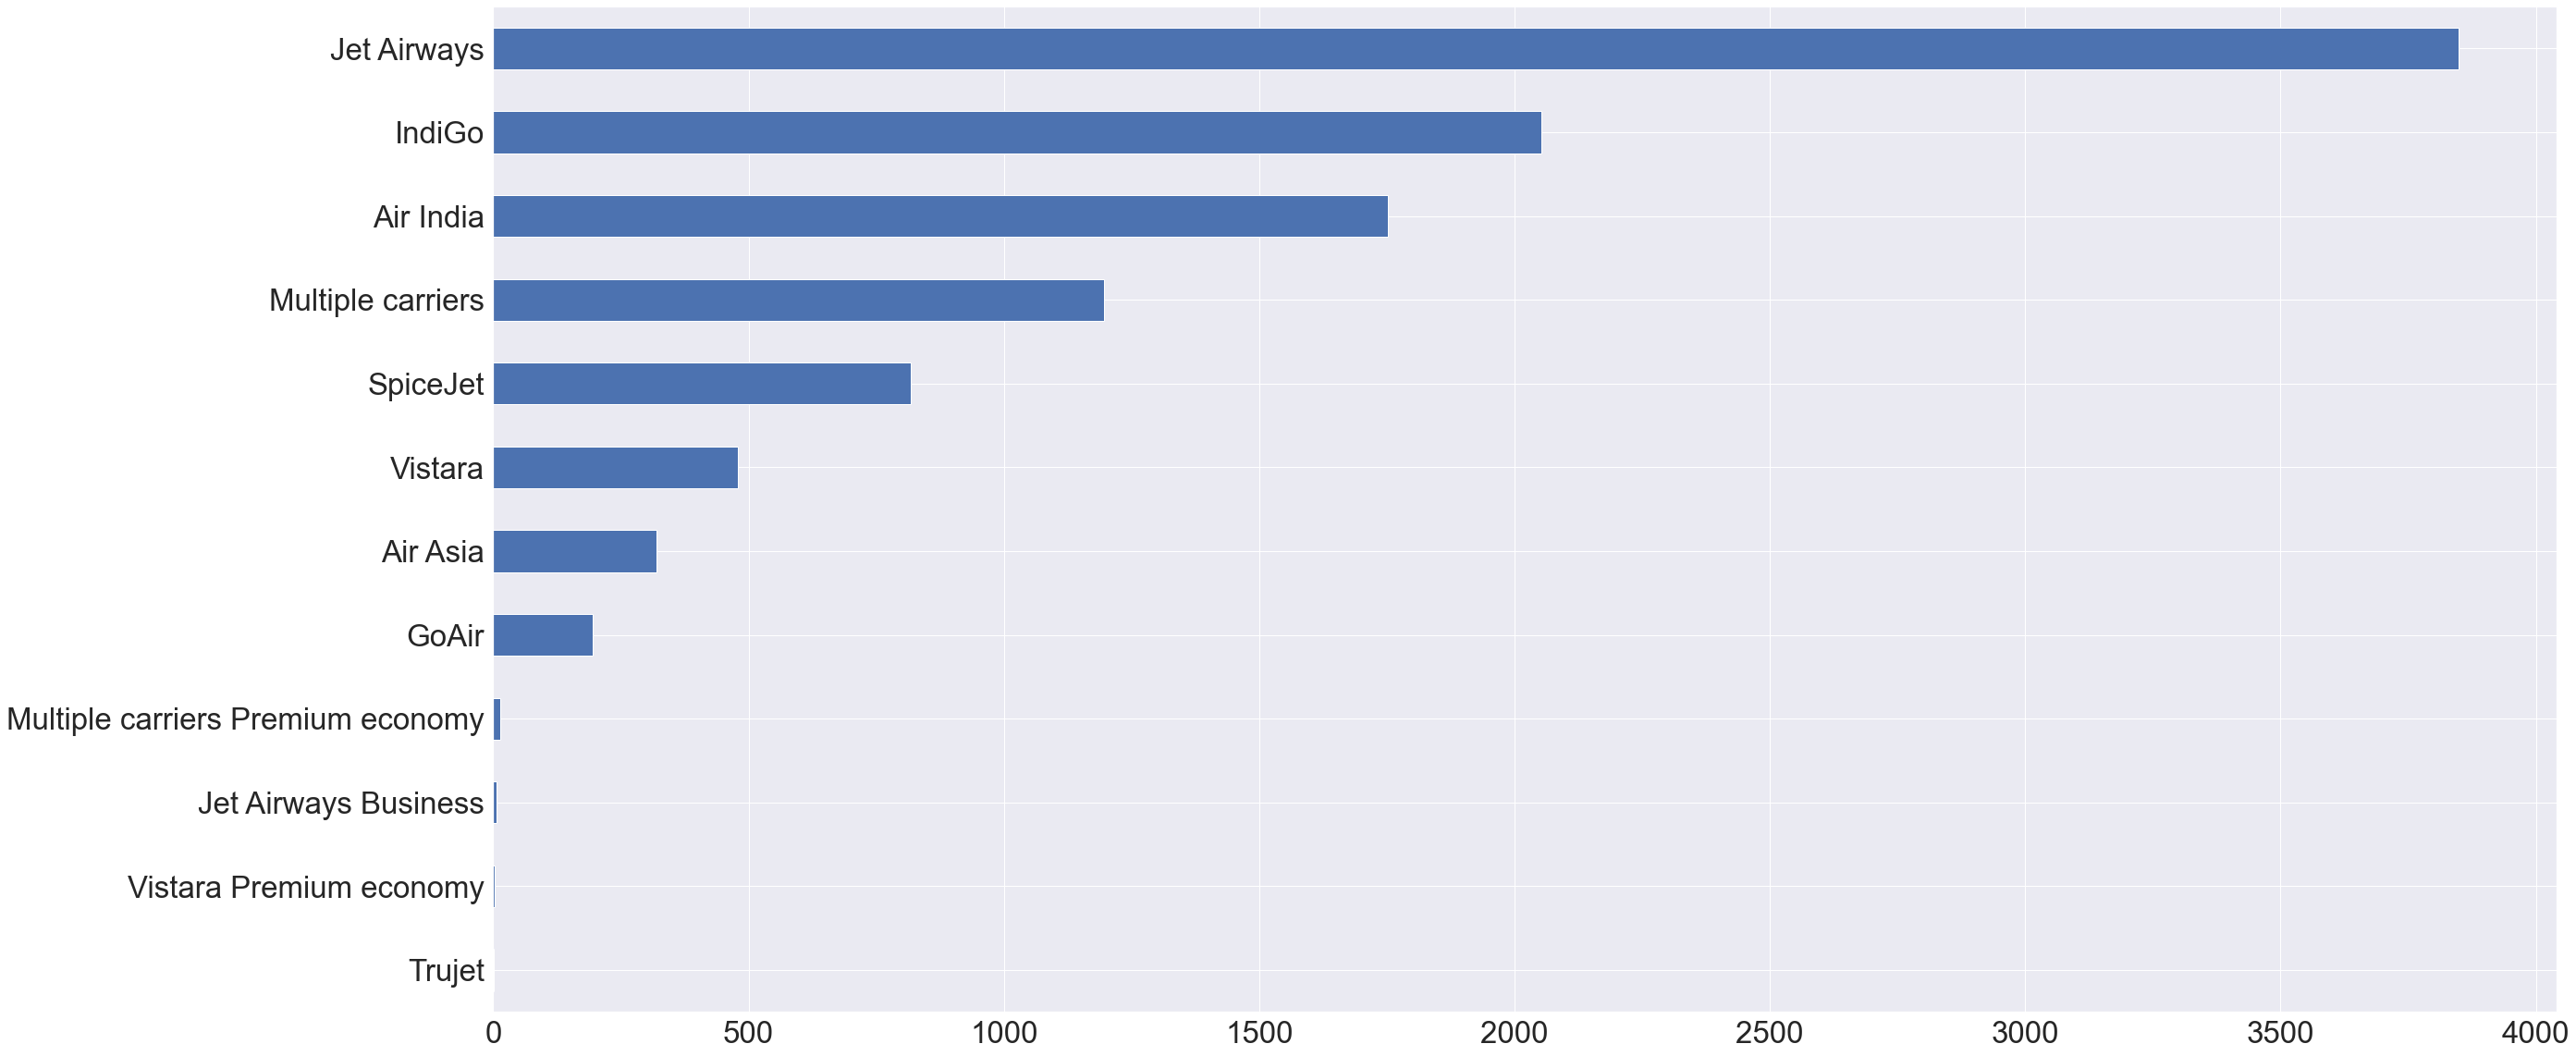

In [13]:
sns.set_theme(style='darkgrid',palette='deep',font_scale=3, color_codes=True)
plt.figure(figsize=(40,20))
#train data
trs.Airline.value_counts().sort_values(ascending=True).plot.barh(rot=0)

<AxesSubplot:>

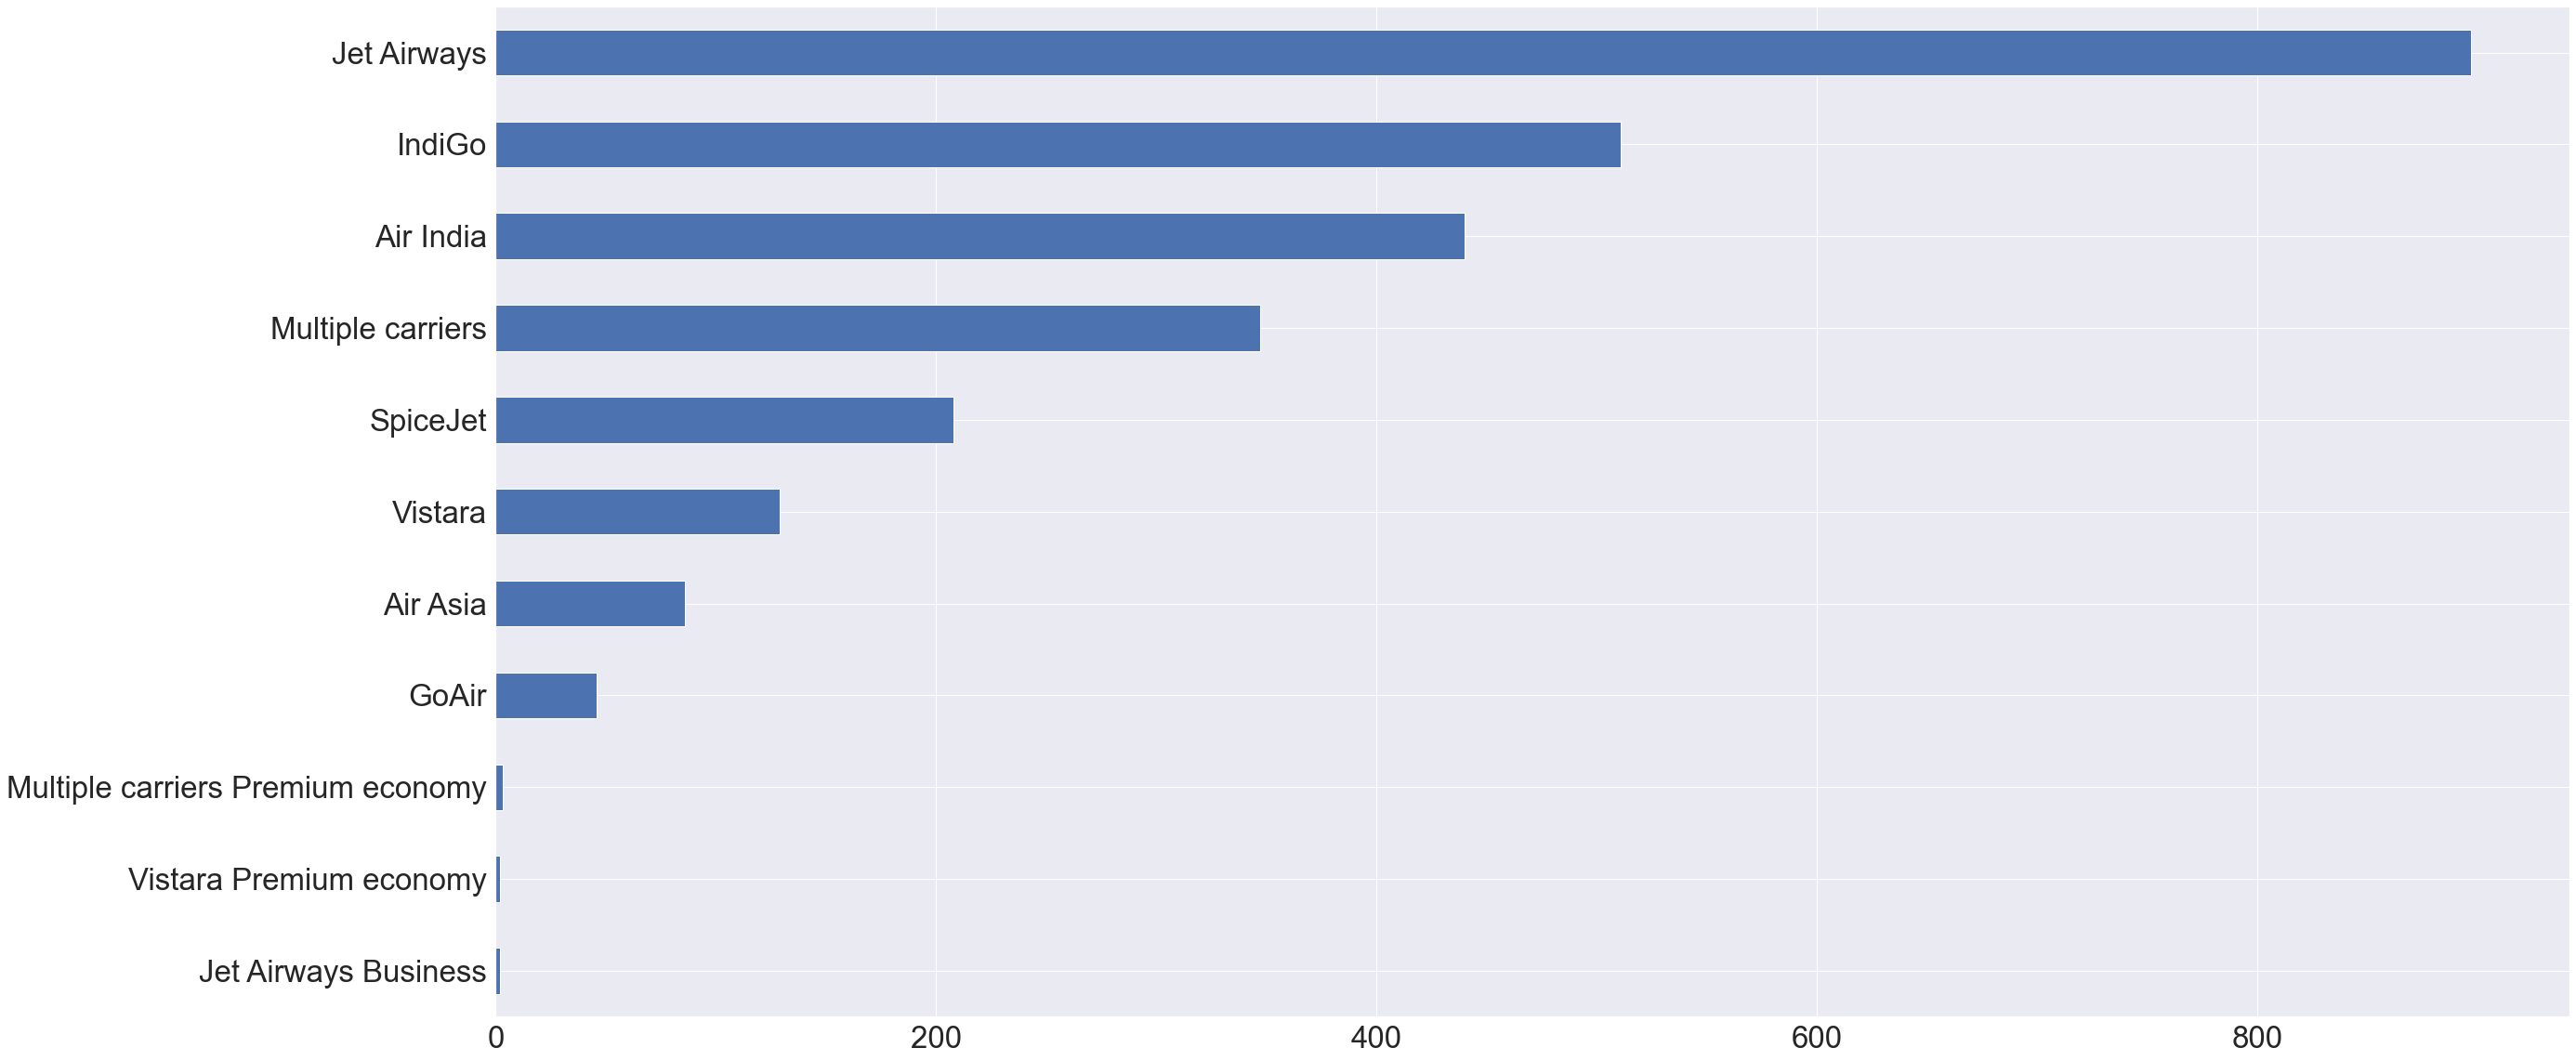

In [14]:
sns.set_theme(style='darkgrid',palette='deep',font_scale=3, color_codes=True)
plt.figure(figsize=(40,20))
#test data
tes.Airline.value_counts().sort_values(ascending=True).plot.barh(rot=0)

### it is clear that the people using the jet airways mostly follows Indigo,Air India

<AxesSubplot:>

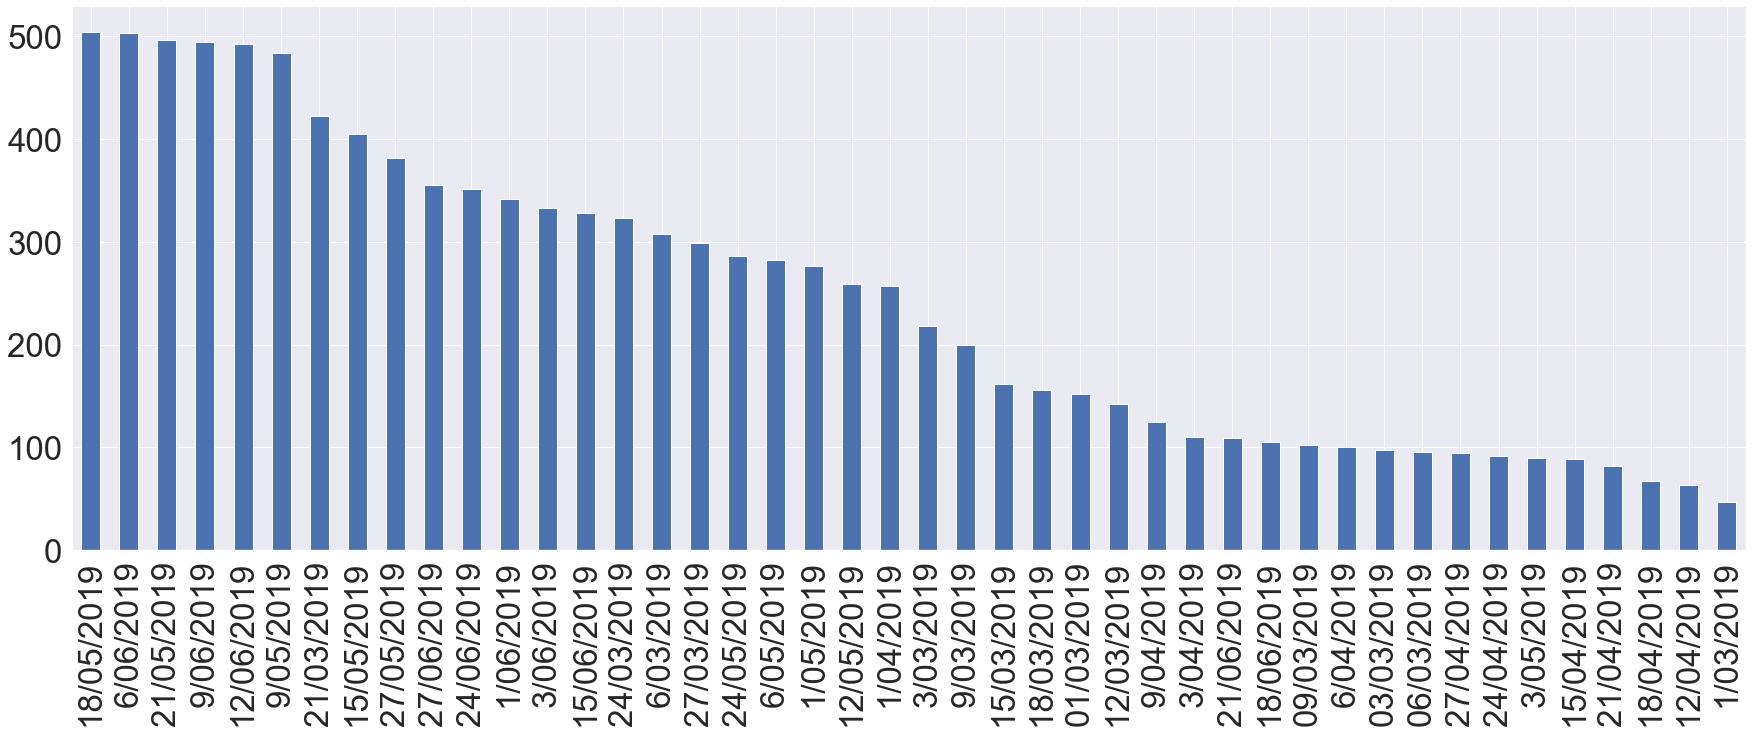

In [15]:
sns.set_theme(style='darkgrid',palette='deep',font_scale=3, color_codes=True)
plt.figure(figsize=(30,10))
#train data
trs.Date_of_Journey.value_counts().plot.bar(rot=90)

<AxesSubplot:>

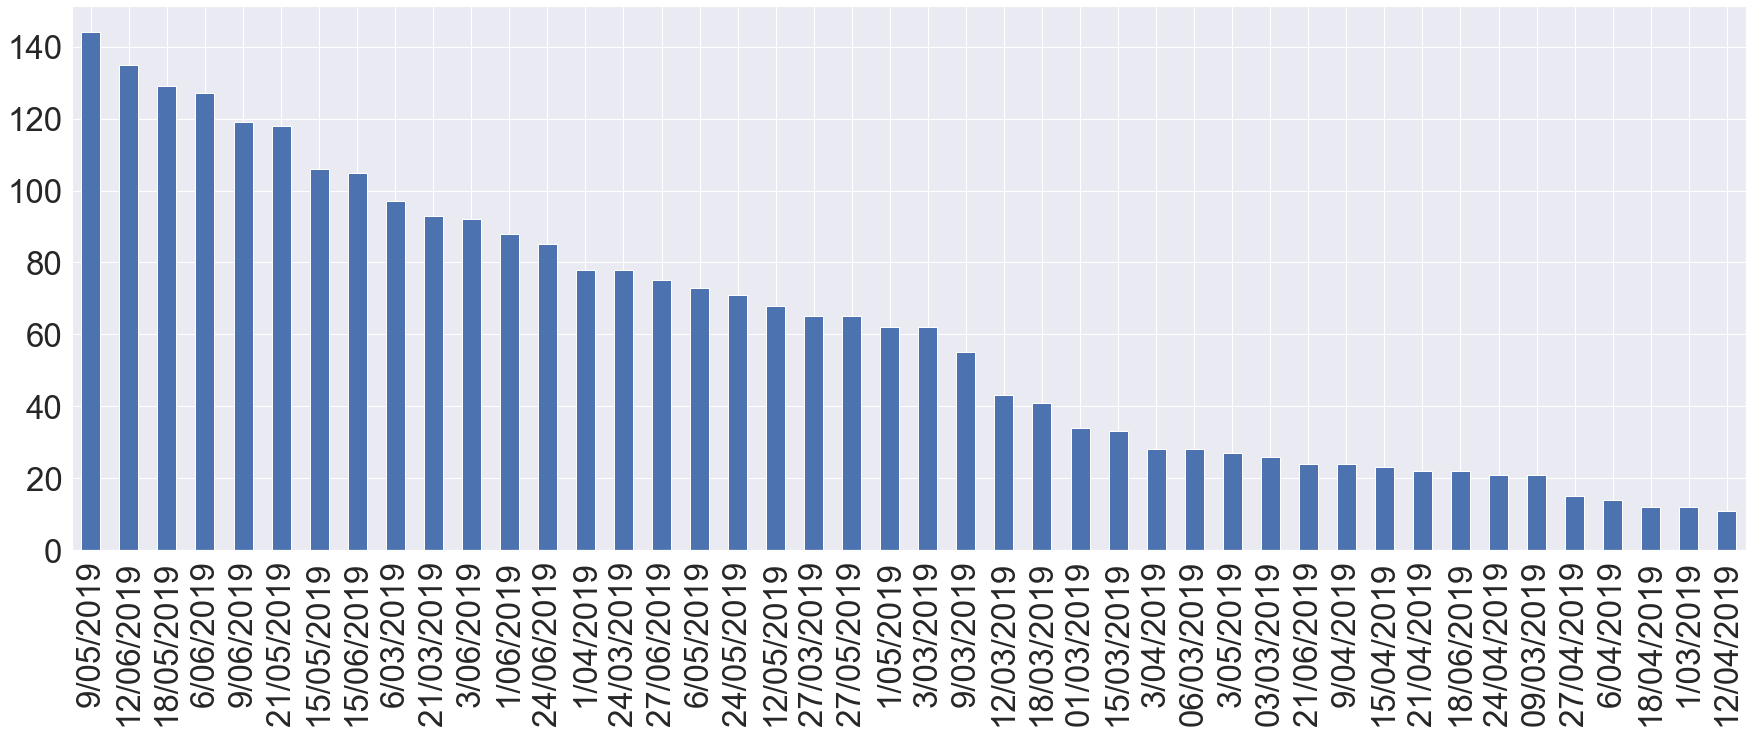

In [16]:
sns.set_theme(style='darkgrid',palette='deep',font_scale=3, color_codes=True)
plt.figure(figsize=(30,10))
#test data
tes.Date_of_Journey.value_counts().plot.bar(rot=90)

the journey on 18/05/2019 was compared to of all the date was high


<AxesSubplot:>

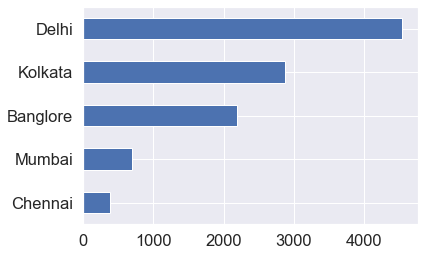

In [17]:
#train data 
sns.set_theme(style='darkgrid',palette='deep',font_scale=1.5, color_codes=True)
trs.Source.value_counts().sort_values(ascending=True).plot.barh(rot=0)

<AxesSubplot:>

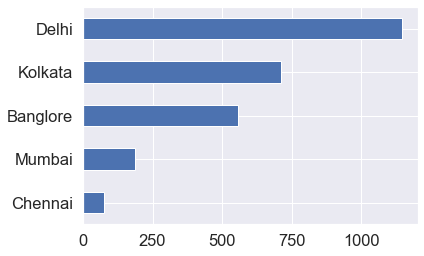

In [18]:
#test data
tes.Source.value_counts().sort_values(ascending=True).plot.barh(rot=0)

From both the data grphs we can see that the Delhi is preferred place of bording for journey

<AxesSubplot:>

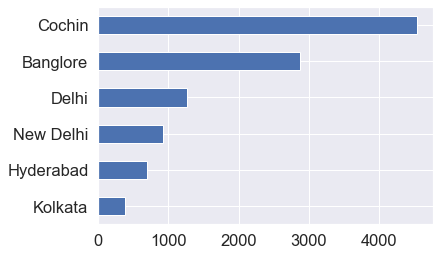

In [19]:
#train data 
trs.Destination.value_counts().sort_values(ascending=True).plot.barh(rot=0)

<AxesSubplot:>

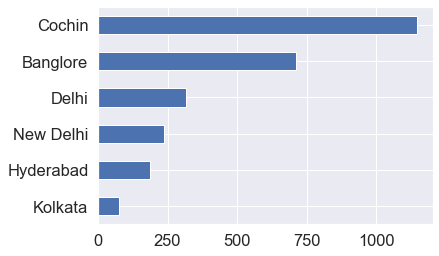

In [20]:
#test data 
tes.Destination.value_counts().sort_values(ascending=True).plot.barh(rot=0)

From both the data sets it clear that the people most frequently travelling to Cochin as high

<AxesSubplot:title={'center':'Route'}>

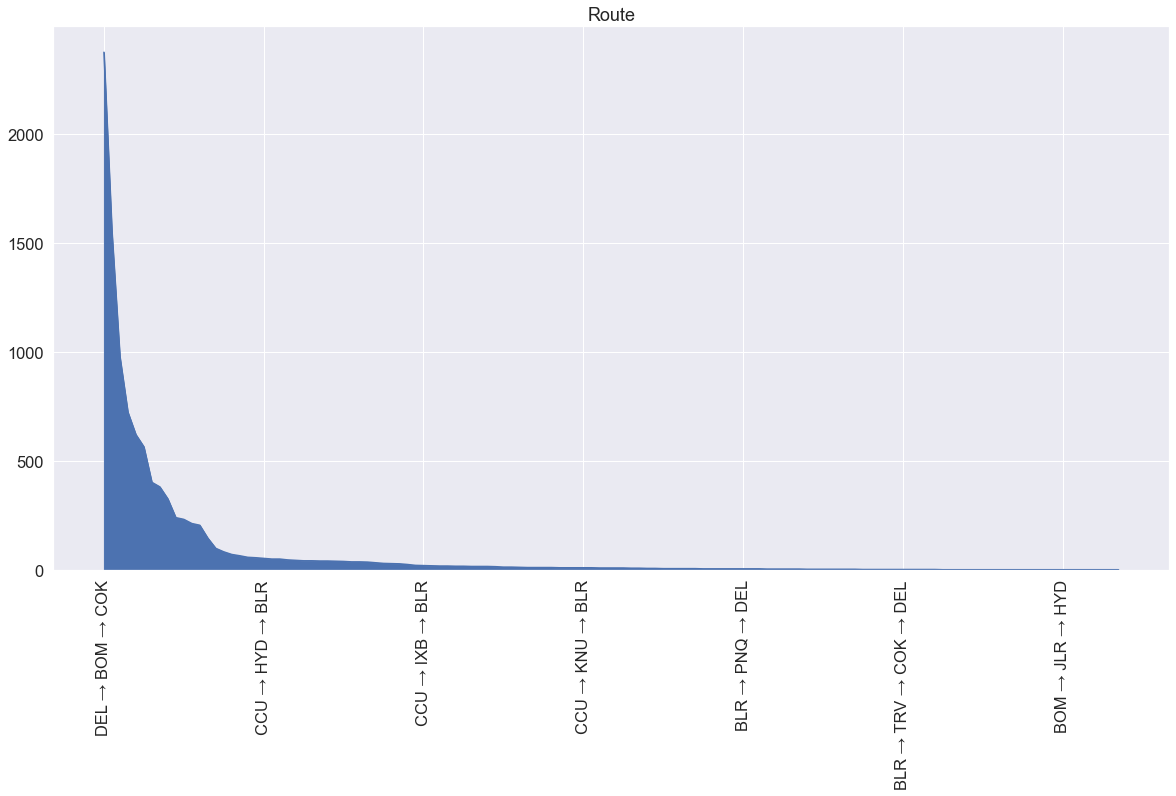

In [21]:
#train data 
plt.figure(figsize=(20,10))
plt.title('Route')
trs.Route.value_counts().sort_values(ascending=False).plot.area(x=list(trs['Route']),rot=90)

<AxesSubplot:title={'center':'Route'}>

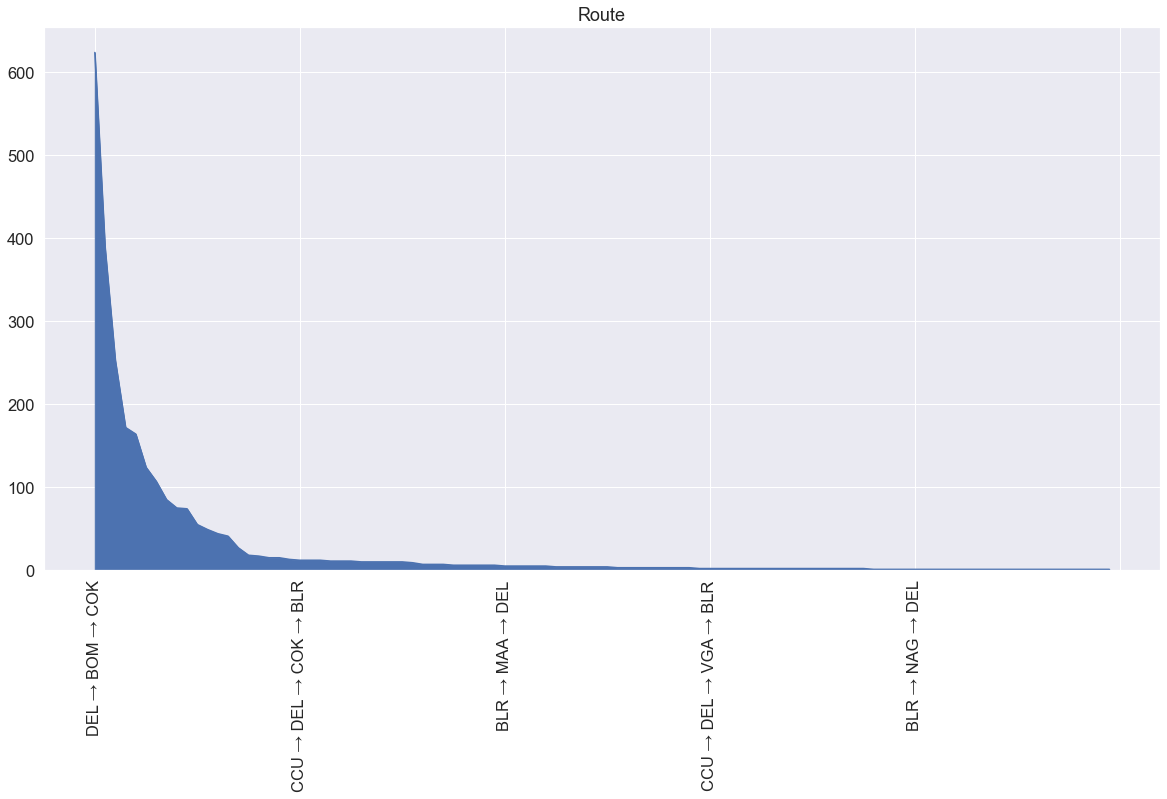

In [22]:
#test data 
plt.figure(figsize=(20,10))
plt.title('Route')
tes.Route.value_counts().sort_values(ascending=False).plot.area(x=list(trs['Route']),rot=90)

the route DEL-BOM-COk is the highly used one for travelling

<AxesSubplot:title={'center':'Route'}>

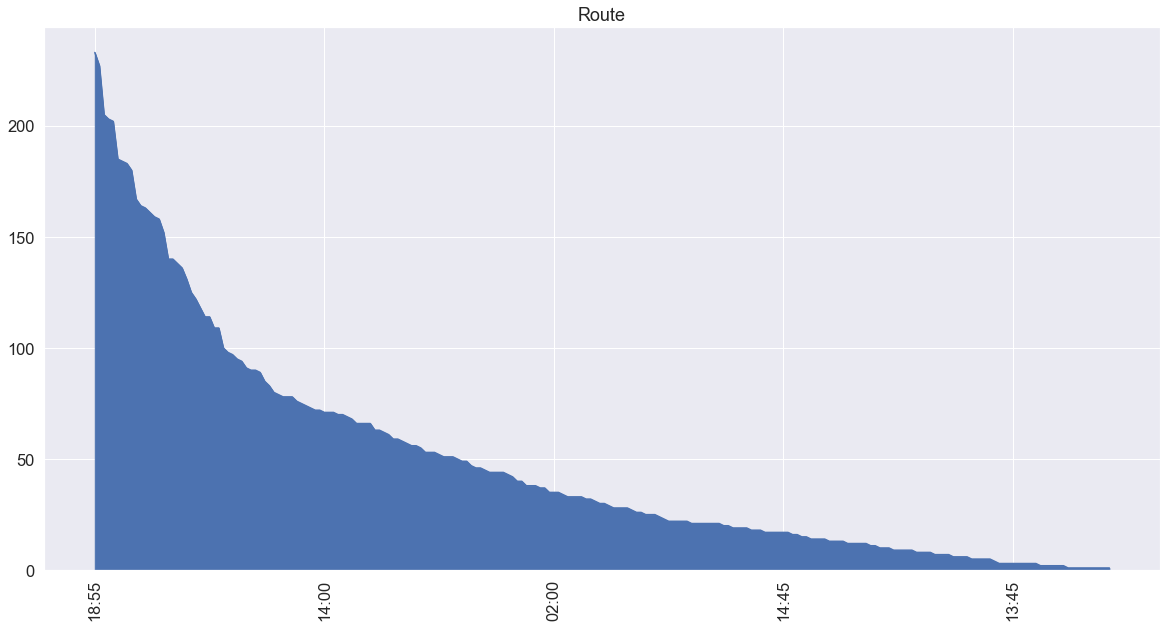

In [23]:
#train data 
plt.figure(figsize=(20,10))
plt.title('Route')
trs.Dep_Time.value_counts().sort_values(ascending=False).plot.area(x=list(trs['Route']),rot=90)

    people like to travel in the evening times than other time in the day
    comes 2nd the morning time

<AxesSubplot:title={'center':'Route'}>

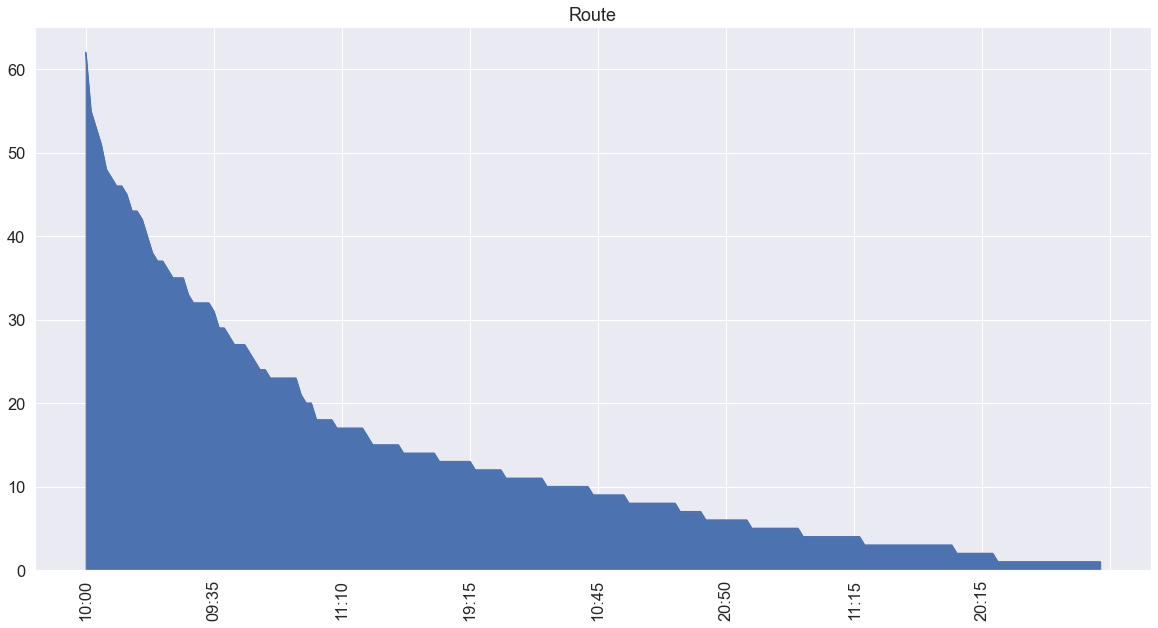

In [24]:
#test data 
plt.figure(figsize=(20,10))
plt.title('Route')
tes.Dep_Time.value_counts().sort_values(ascending=False).plot.area(x=list(trs['Route']),rot=90)

in test data set people used morning time to travel highly compared to the remaining times

<AxesSubplot:title={'center':'Route'}>

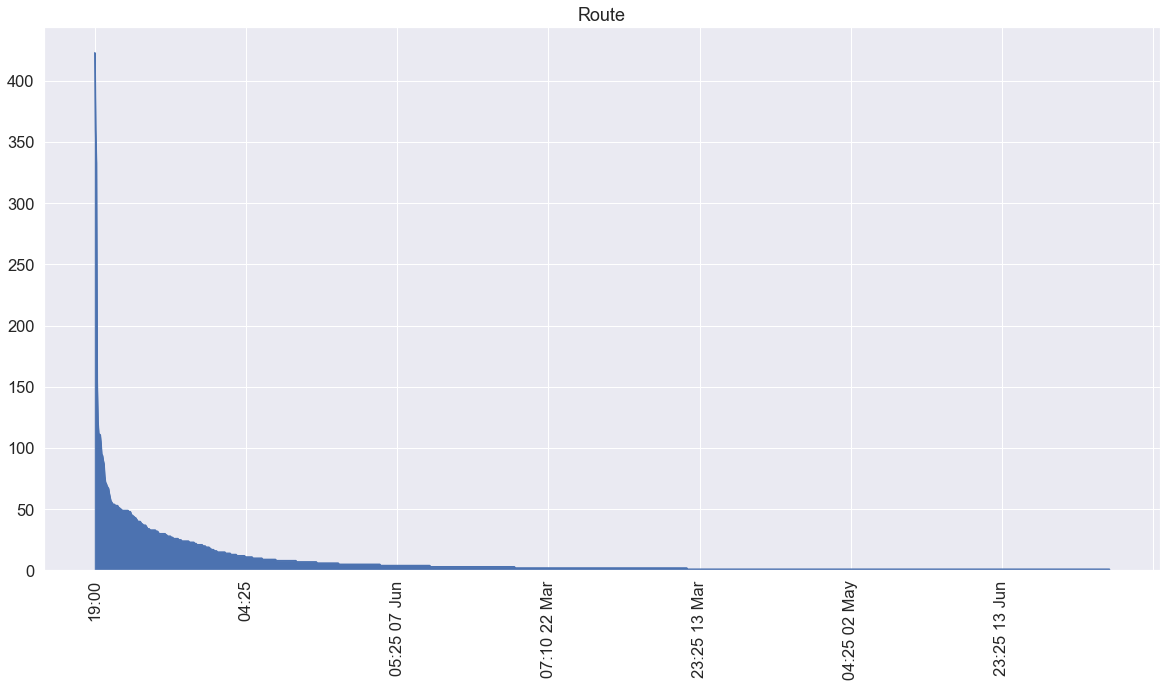

In [25]:
#train data 
plt.figure(figsize=(20,10))
plt.title('Route')
trs.Arrival_Time.value_counts().sort_values(ascending=False).plot.area(x=list(trs['Route']),rot=90)

<AxesSubplot:title={'center':'Route'}>

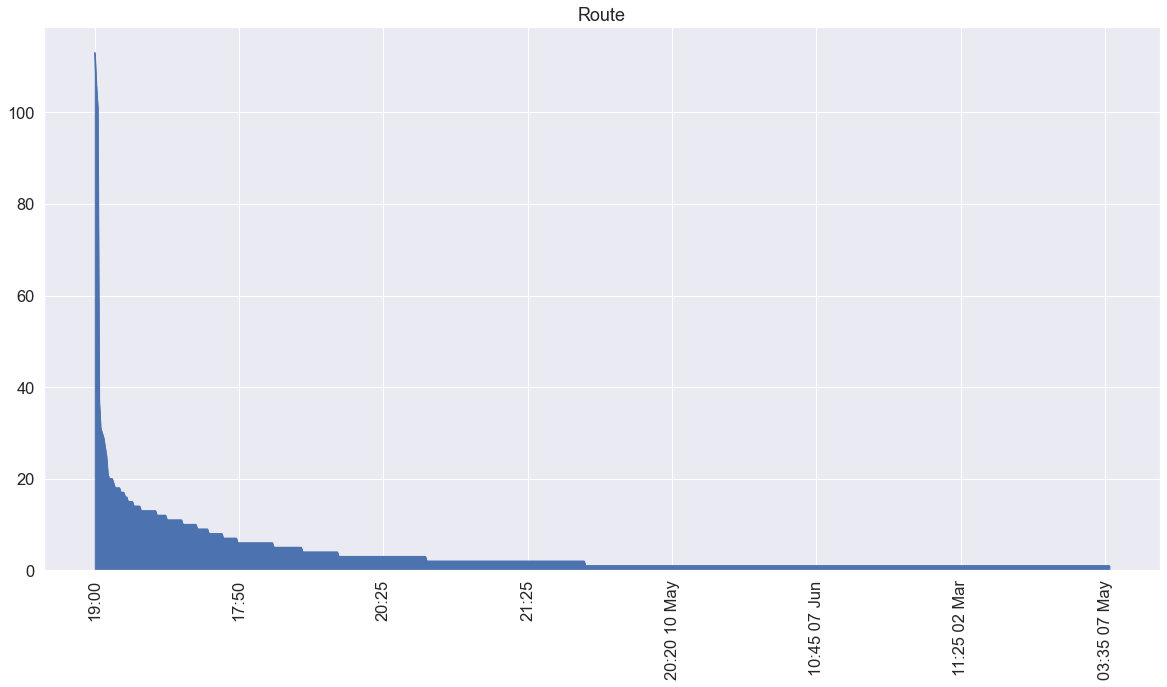

In [26]:
#test data 
plt.figure(figsize=(20,10))
plt.title('Route')
tes.Arrival_Time.value_counts().sort_values(ascending=False).plot.area(x=list(trs['Route']),rot=90)

in both the data sets we can see that the people choses to reach the destination by evening ie.7pm to 5pm

<AxesSubplot:title={'center':'Duration'}>

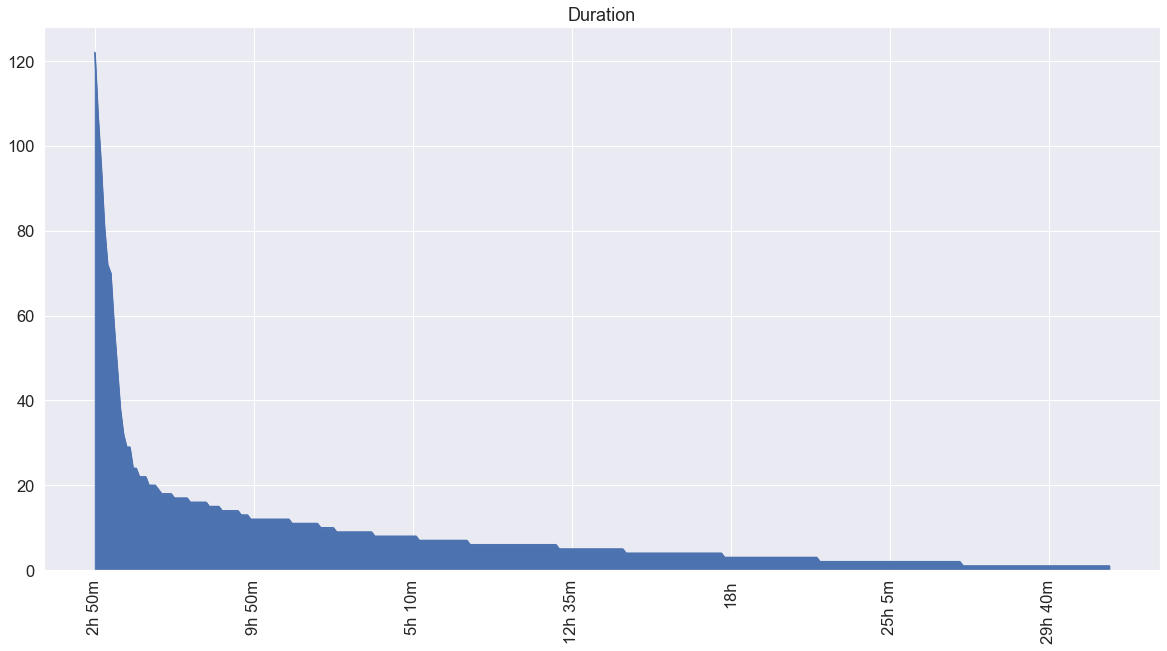

In [27]:
#test data 
plt.figure(figsize=(20,10))
plt.title('Duration')
tes.Duration.value_counts().sort_values(ascending=False).plot.area(rot=90)

<AxesSubplot:title={'center':'Duration'}>

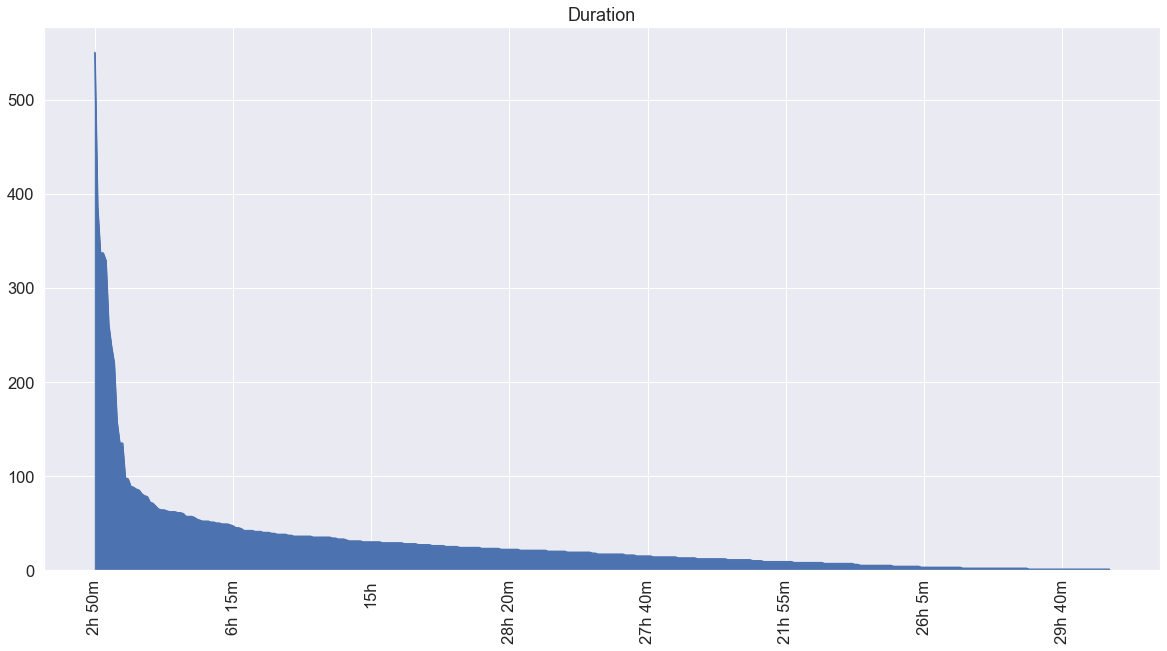

In [28]:
#train data 
plt.figure(figsize=(20,10))
plt.title('Duration')
trs.Duration.value_counts().sort_values(ascending=False).plot.area(rot=90)

duration of 24h50m is high, people used to travel by flight for short distance than long distnaces

<AxesSubplot:title={'center':'Intermediate Stops'}>

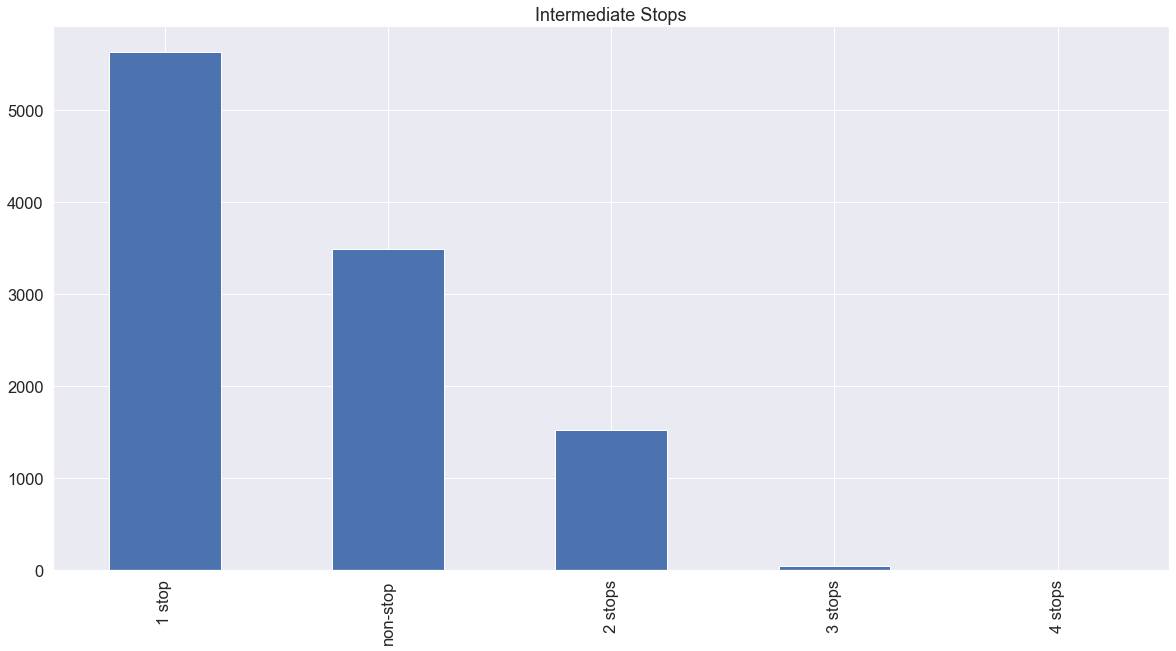

In [29]:
#train data 
plt.figure(figsize=(20,10))
plt.title('Intermediate Stops')
trs.Total_Stops.value_counts().sort_values(ascending=False).plot.bar(rot=90)

<AxesSubplot:title={'center':'Intermediate Stops'}>

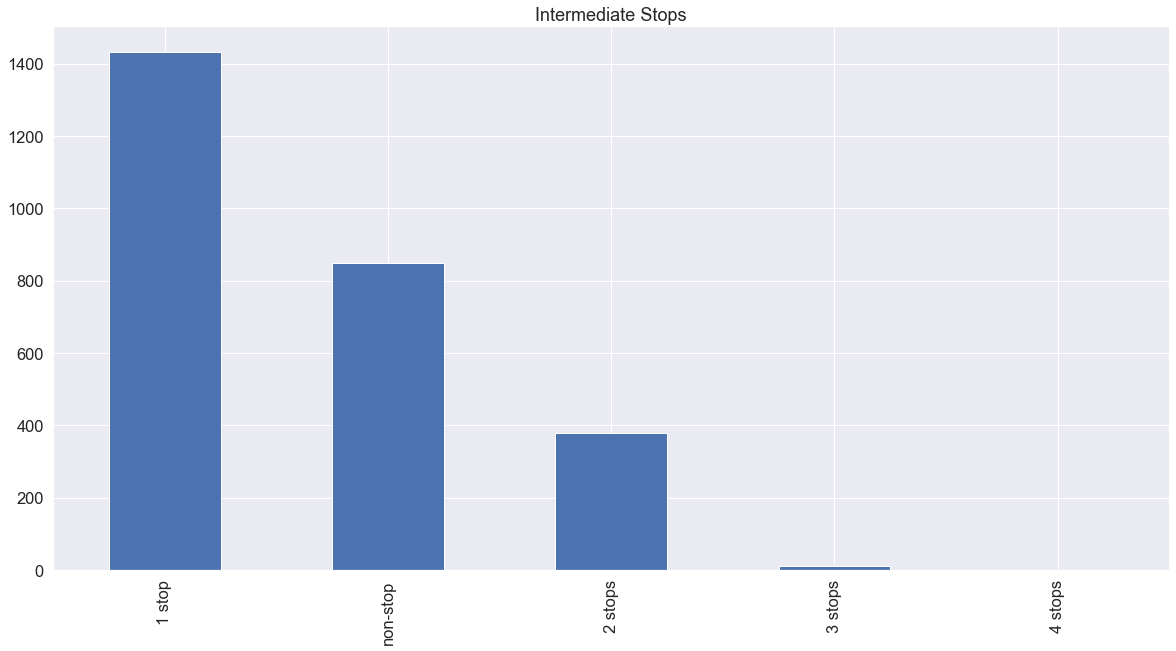

In [30]:
#test data 
plt.figure(figsize=(20,10))
plt.title('Intermediate Stops')
tes.Total_Stops.value_counts().sort_values(ascending=False).plot.bar(rot=90)

1 stop high followed with non stop flighs as most people travel by

In [31]:
trs.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


<AxesSubplot:title={'center':'Price'}>

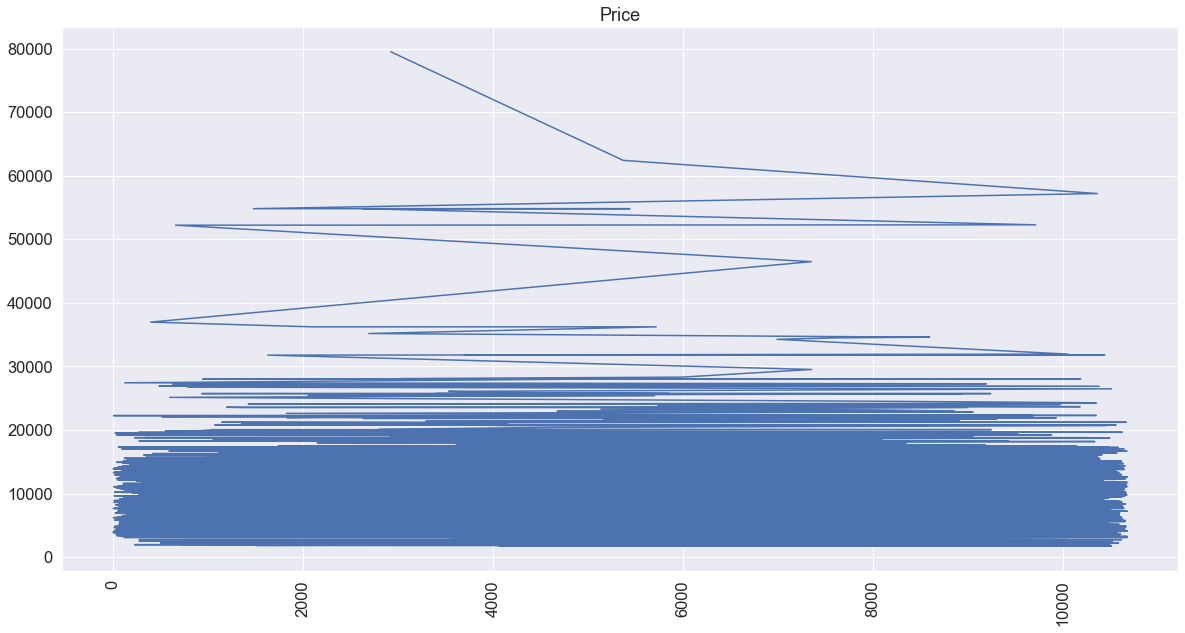

In [32]:
#train data 
plt.figure(figsize=(20,10))
plt.title('Price')
trs.Price.sort_values(ascending=False).plot.line(rot=90)

the high density was in between the price rabge of 2500 to 25000

<AxesSubplot:title={'center':'Price'}>

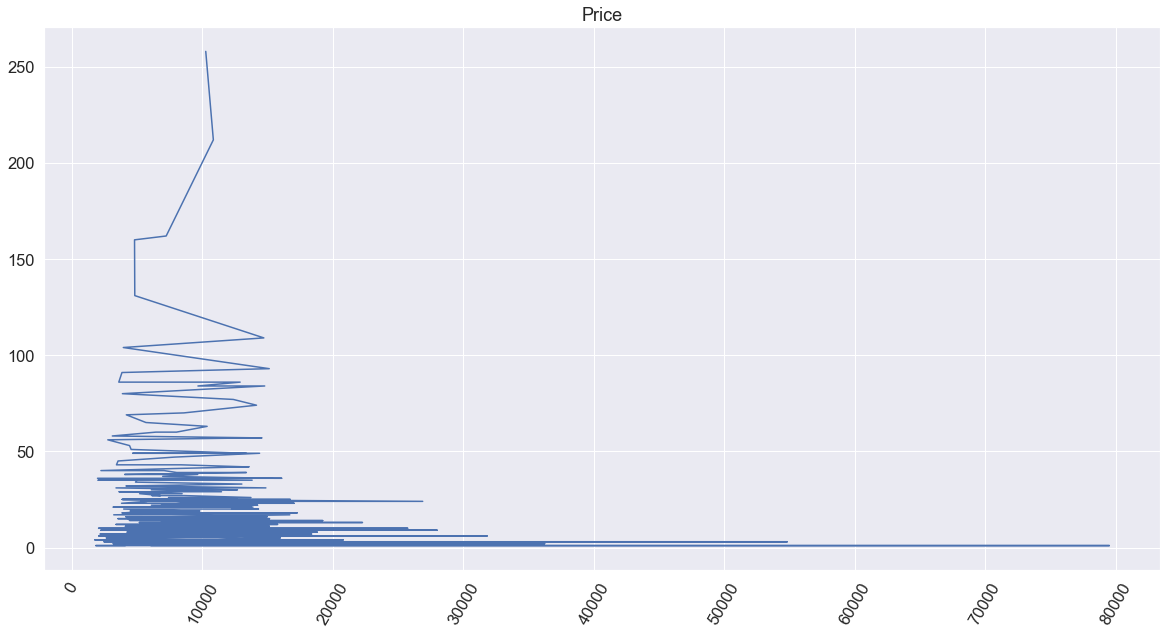

In [33]:
#train data 
plt.figure(figsize=(20,10))
plt.title('Price')
trs.Price.value_counts().sort_values(ascending=False).plot.line(rot=60)

Before doing the bivarient analysis we are going to split the columns of date time duration into separate values

In [9]:
# splitting of the Date of Journey to days month and years
trs['Date_of_Journey']=trs['Date_of_Journey'].str.split('/')
trs['Journey_Date']=trs['Date_of_Journey'].str[0]
trs['Journey_Month']=trs['Date_of_Journey'].str[1]
trs['Journey_Year']=trs['Date_of_Journey'].str[2]

In [10]:
trs.drop(['Date_of_Journey'], axis=1, inplace=True)

In [11]:
# splittig of departure time into hours and minutes
trs['Dep_Time']=trs['Dep_Time'].str.split(':')
trs['Dep_Hours']=trs['Dep_Time'].str[0]
trs['Dep_Minute']=trs['Dep_Time'].str[1]

In [12]:
trs.drop(['Dep_Time'],axis=1,inplace=True)

In [13]:
#splitting the route
trs.Route=trs.Route.str.split('→')

In [14]:
trs['city1']=trs['Route'].str[0]
trs['city2']=trs['Route'].str[1]
trs['city3']=trs['Route'].str[2]
trs['city3']=trs['Route'].str[3]
trs['city4']=trs['Route'].str[4]
trs['city5']=trs['Route'].str[5]
trs.drop(['Route'],axis=1,inplace=True)

In [15]:
#splitting the arrival time
trs['Arrival_Time']=trs['Arrival_Time'].str.split(':')
trs['Arrival_Hour']=trs['Arrival_Time'].str[0]
trs['Arrival_Minute']=trs['Arrival_Time'].str[1]
trs.drop(['Arrival_Time'],axis=1,inplace=True)

In [16]:
trs['Arrival_Minute']=trs['Arrival_Minute'].str.split(' ')

In [17]:
trs['Arrival_Minute']=trs['Arrival_Minute'].str[0]

In [18]:
#splitting the Duration into hours and minutes of journey
trs.Duration=trs.Duration.str.split(' ')
trs['Duration_Hours']=trs.Duration.str[0]
trs['Duration_Minutes']=trs.Duration.str[1]
trs.drop(['Duration'],axis=1,inplace=True)

In [19]:
trs.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hours,Dep_Minute,city1,city2,city3,city4,city5,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,03,2019,22,20,BLR,DEL,NaN,NaN,NaN,01,10,2h,50m
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,05,2019,05,50,CCU,IXR,BLR,NaN,NaN,13,15,7h,25m


In [20]:
trs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Total_Stops       10682 non-null  object
 4   Additional_Info   10683 non-null  object
 5   Price             10683 non-null  int64 
 6   Journey_Date      10683 non-null  object
 7   Journey_Month     10683 non-null  object
 8   Journey_Year      10683 non-null  object
 9   Dep_Hours         10683 non-null  object
 10  Dep_Minute        10683 non-null  object
 11  city1             10682 non-null  object
 12  city2             10682 non-null  object
 13  city3             1566 non-null   object
 14  city4             46 non-null     object
 15  city5             1 non-null      object
 16  Arrival_Hour      10683 non-null  object
 17  Arrival_Minu

In [21]:
trs.isna().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Journey_Date            0
Journey_Month           0
Journey_Year            0
Dep_Hours               0
Dep_Minute              0
city1                   1
city2                   1
city3                9117
city4               10637
city5               10682
Arrival_Hour            0
Arrival_Minute          0
Duration_Hours          0
Duration_Minutes     1032
dtype: int64

In [22]:
#replacing nan values with 0
for i in trs.columns:
    trs[i].replace(np.nan,'0',inplace=True)

In [23]:
trs.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Journey_Date        0
Journey_Month       0
Journey_Year        0
Dep_Hours           0
Dep_Minute          0
city1               0
city2               0
city3               0
city4               0
city5               0
Arrival_Hour        0
Arrival_Minute      0
Duration_Hours      0
Duration_Minutes    0
dtype: int64

### same for the testing data

In [24]:
# splitting of the Date of Journey to days month and years
tes['Date_of_Journey']=tes['Date_of_Journey'].str.split('/')
tes['Journey_Date']=tes['Date_of_Journey'].str[0]
tes['Journey_Month']=tes['Date_of_Journey'].str[1]
tes['Journey_Year']=tes['Date_of_Journey'].str[2]
tes.drop(['Date_of_Journey'], axis=1, inplace=True)
# splittig of departure time into hours and minutes
tes['Dep_Time']=tes['Dep_Time'].str.split(':')
tes['Dep_Hours']=tes['Dep_Time'].str[0]
tes['Dep_Minute']=tes['Dep_Time'].str[1]
tes.drop(['Dep_Time'],axis=1,inplace=True)
#splitting the route
tes.Route=tes.Route.str.split('→')
tes['city1']=tes['Route'].str[0]
tes['city2']=tes['Route'].str[1]
tes['city3']=tes['Route'].str[2]
tes['city3']=tes['Route'].str[3]
tes['city4']=tes['Route'].str[4]
tes['city5']=tes['Route'].str[5]
tes.drop(['Route'],axis=1,inplace=True)
#splitting the arrival time
tes['Arrival_Time']=tes['Arrival_Time'].str.split(':')
tes['Arrival_Hour']=tes['Arrival_Time'].str[0]
tes['Arrival_Minute']=tes['Arrival_Time'].str[1]
tes.drop(['Arrival_Time'],axis=1,inplace=True)
tes['Arrival_Minute']=tes['Arrival_Minute'].str.split(' ')
tes['Arrival_Minute']=tes['Arrival_Minute'].str[0]
#splitting the Duration into hours and minutes of journey
tes.Duration=tes.Duration.str.split(' ')
tes['Duration_Hours']=tes.Duration.str[0]
tes['Duration_Minutes']=tes.Duration.str[1]
tes.drop(['Duration'],axis=1,inplace=True)

In [25]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           2671 non-null   object
 1   Source            2671 non-null   object
 2   Destination       2671 non-null   object
 3   Total_Stops       2671 non-null   object
 4   Additional_Info   2671 non-null   object
 5   Journey_Date      2671 non-null   object
 6   Journey_Month     2671 non-null   object
 7   Journey_Year      2671 non-null   object
 8   Dep_Hours         2671 non-null   object
 9   Dep_Minute        2671 non-null   object
 10  city1             2671 non-null   object
 11  city2             2671 non-null   object
 12  city3             391 non-null    object
 13  city4             12 non-null     object
 14  city5             1 non-null      object
 15  Arrival_Hour      2671 non-null   object
 16  Arrival_Minute    2671 non-null   object
 17  Duration_Hours

In [26]:
tes.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Journey_Date           0
Journey_Month          0
Journey_Year           0
Dep_Hours              0
Dep_Minute             0
city1                  0
city2                  0
city3               2280
city4               2659
city5               2670
Arrival_Hour           0
Arrival_Minute         0
Duration_Hours         0
Duration_Minutes     254
dtype: int64

In [27]:
#replacing nan values with 0
for i in tes.columns:
    tes[i].replace(np.nan,'0',inplace=True)

In [28]:
tes.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Journey_Date        0
Journey_Month       0
Journey_Year        0
Dep_Hours           0
Dep_Minute          0
city1               0
city2               0
city3               0
city4               0
city5               0
Arrival_Hour        0
Arrival_Minute      0
Duration_Hours      0
Duration_Minutes    0
dtype: int64

In [29]:
tes.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Dep_Hours,Dep_Minute,city1,city2,city3,city4,city5,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,06,2019,17,30,DEL,BOM,0,0,0,04,25,10h,55m
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,05,2019,06,20,CCU,MAA,0,0,0,10,20,4h,0


#### Bivarient Analysis

In [30]:
# Before this we need to convert the string data to numeric data
# by using lable encoders
# importing the encoders from the sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb=LabelEncoder()
for i in trs.columns:
    if trs[i].dtype==object:
        trs[i]=lb.fit_transform(trs[i])


In [31]:
for i in tes.columns:
        tes[i]=lb.fit_transform(tes[i])

<Figure size 1440x720 with 0 Axes>

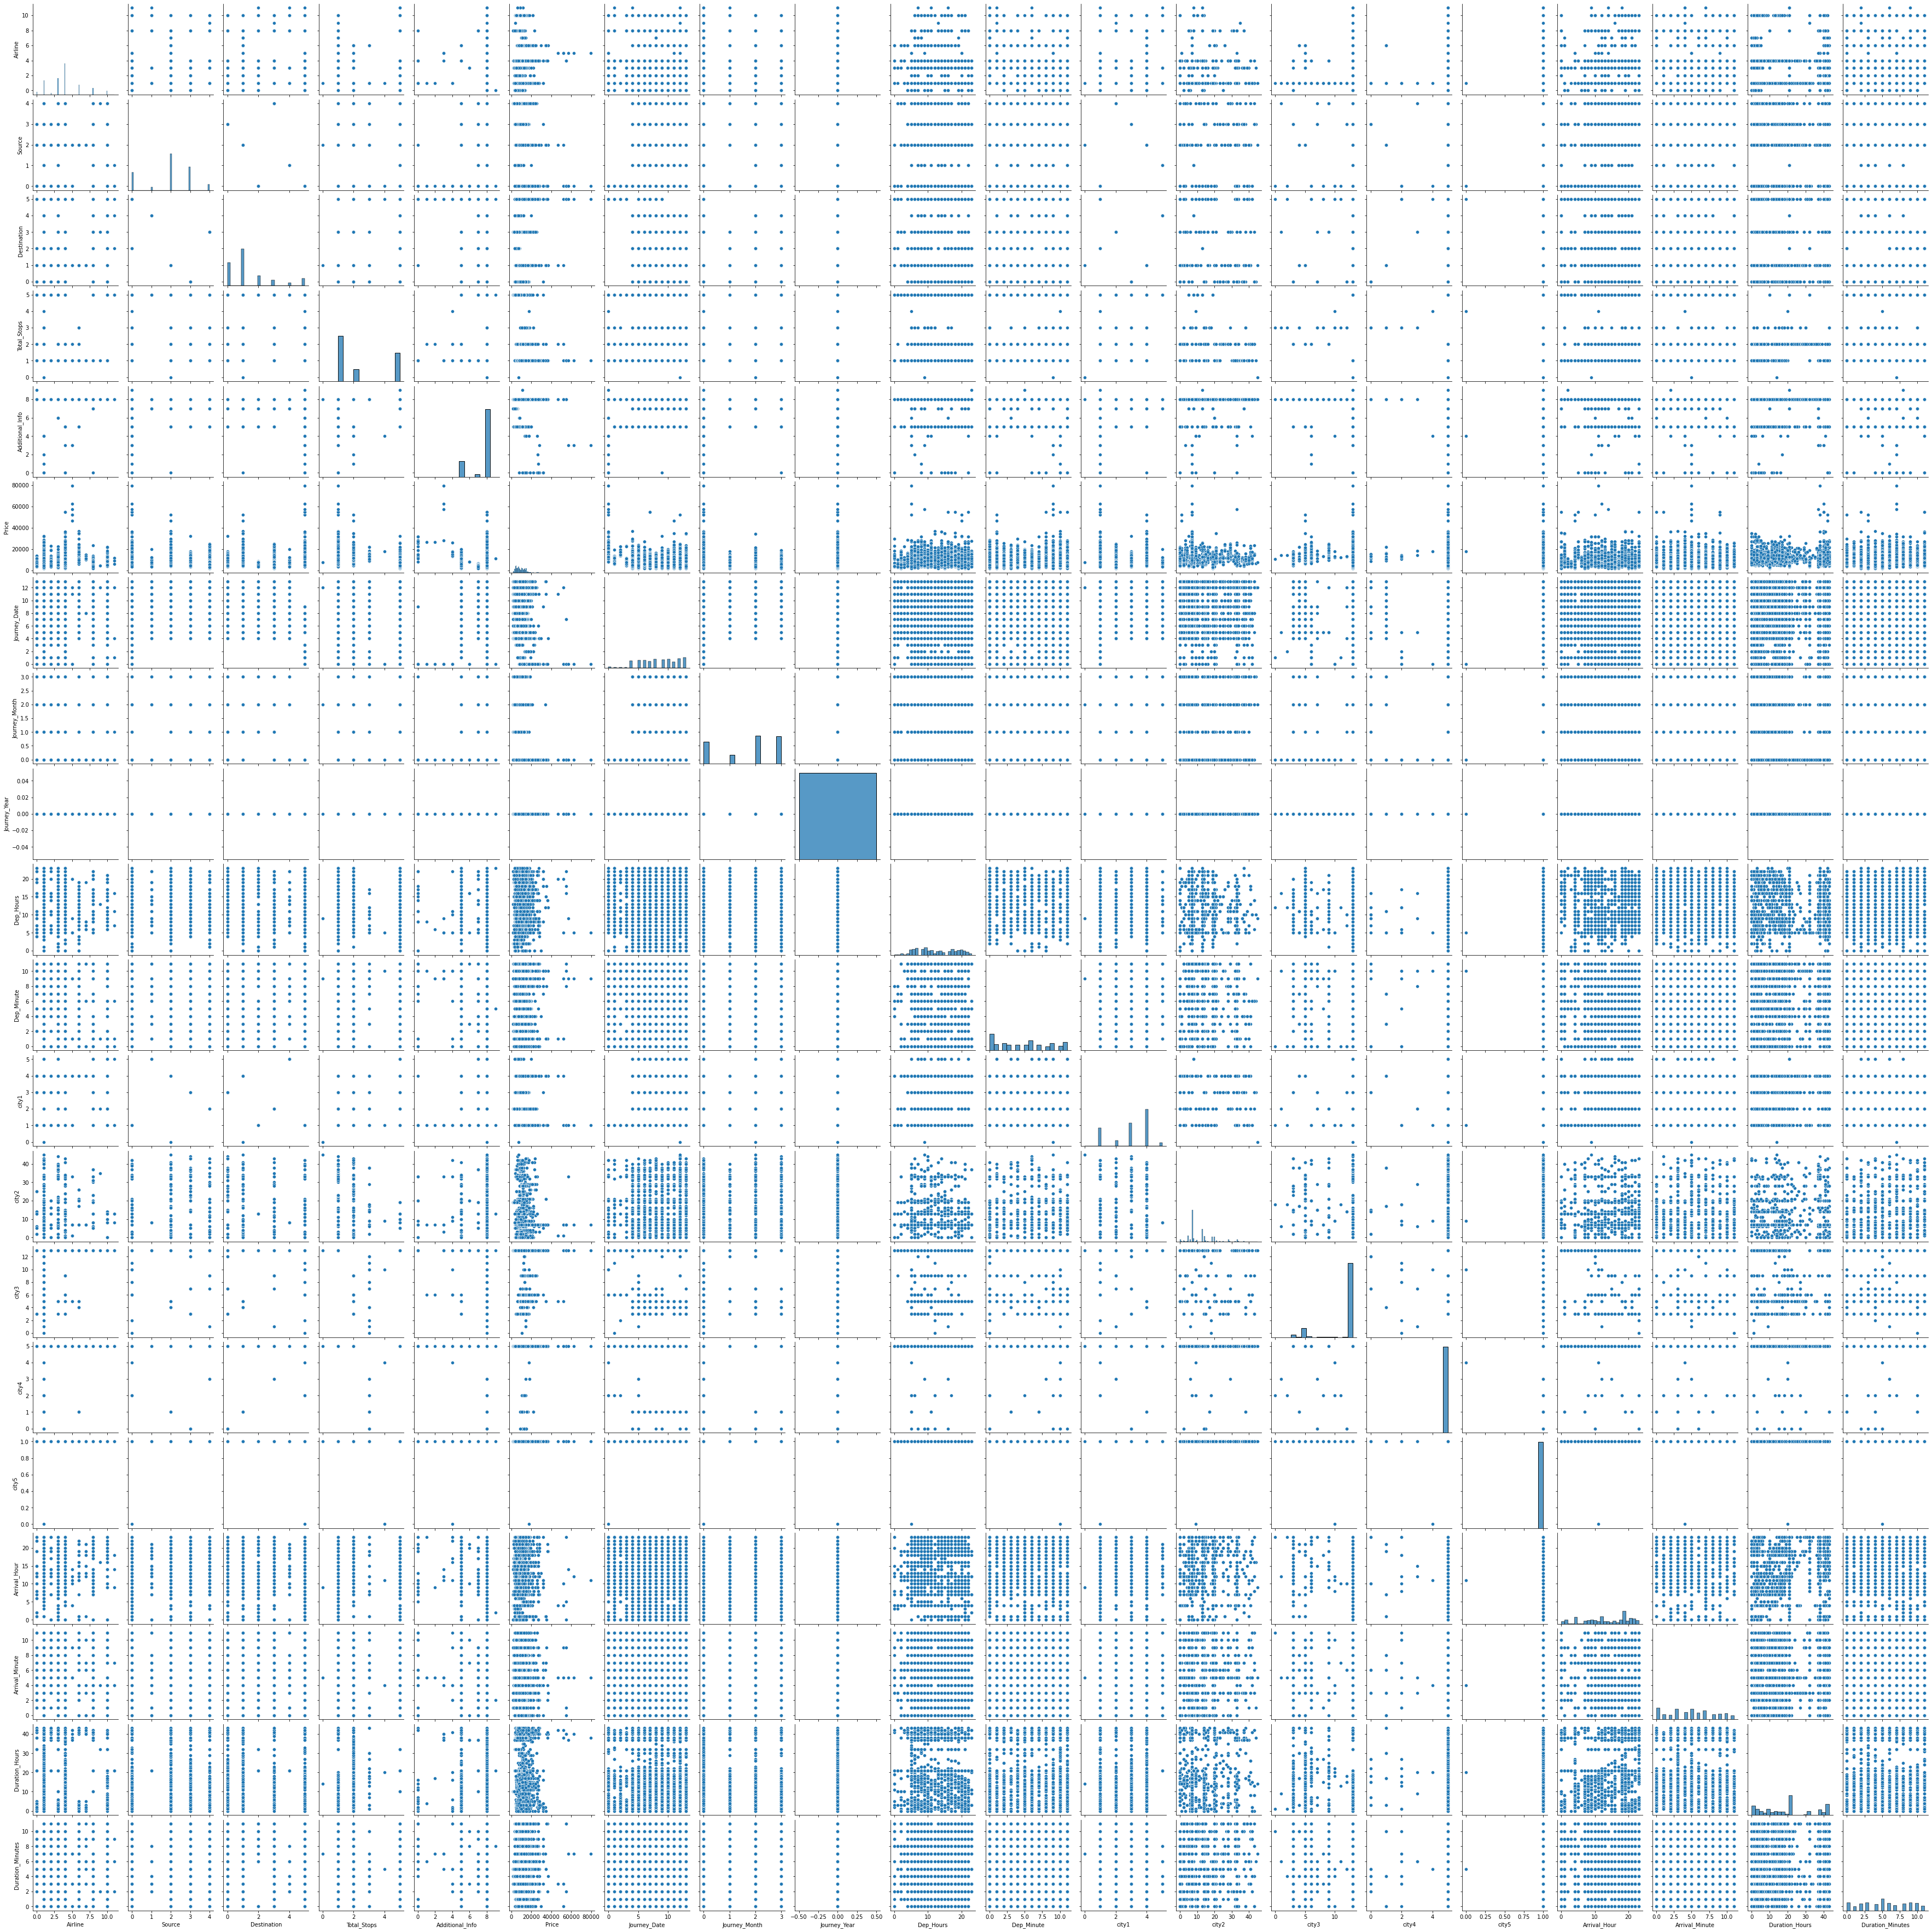

In [35]:
plt.figure(figsize=(20,10))
sns.pairplot(trs)

### Observations:
    1.few airlines runs the flights in particular dates only remaining all are running flights in all days
    2.not all airlines are operating in all the provided sources
    3.majority of air lines covering all the routes
    4.all airlines are operating all the times in a day
    5.non stop flights are more compared to 5 stop flights
    6.all airlines having all range of prices
    7. there is no direct or indirect relation between duration and no of stops
    more stops having less duration and more stops is for more duration.
    8.price and duration has no relation directly or indirectly, all duraion of travel have all range of ticket price

### check for outliers


Airline             AxesSubplot(0.125,0.848277;0.775x0.0317227)
Source               AxesSubplot(0.125,0.81021;0.775x0.0317227)
Destination         AxesSubplot(0.125,0.772143;0.775x0.0317227)
Total_Stops         AxesSubplot(0.125,0.734076;0.775x0.0317227)
Additional_Info     AxesSubplot(0.125,0.696008;0.775x0.0317227)
Price               AxesSubplot(0.125,0.657941;0.775x0.0317227)
Journey_Date        AxesSubplot(0.125,0.619874;0.775x0.0317227)
Journey_Month       AxesSubplot(0.125,0.581807;0.775x0.0317227)
Journey_Year        AxesSubplot(0.125,0.543739;0.775x0.0317227)
Dep_Hours           AxesSubplot(0.125,0.505672;0.775x0.0317227)
Dep_Minute          AxesSubplot(0.125,0.467605;0.775x0.0317227)
city1               AxesSubplot(0.125,0.429538;0.775x0.0317227)
city2               AxesSubplot(0.125,0.391471;0.775x0.0317227)
city3               AxesSubplot(0.125,0.353403;0.775x0.0317227)
city4               AxesSubplot(0.125,0.315336;0.775x0.0317227)
city5               AxesSubplot(0.125,0.

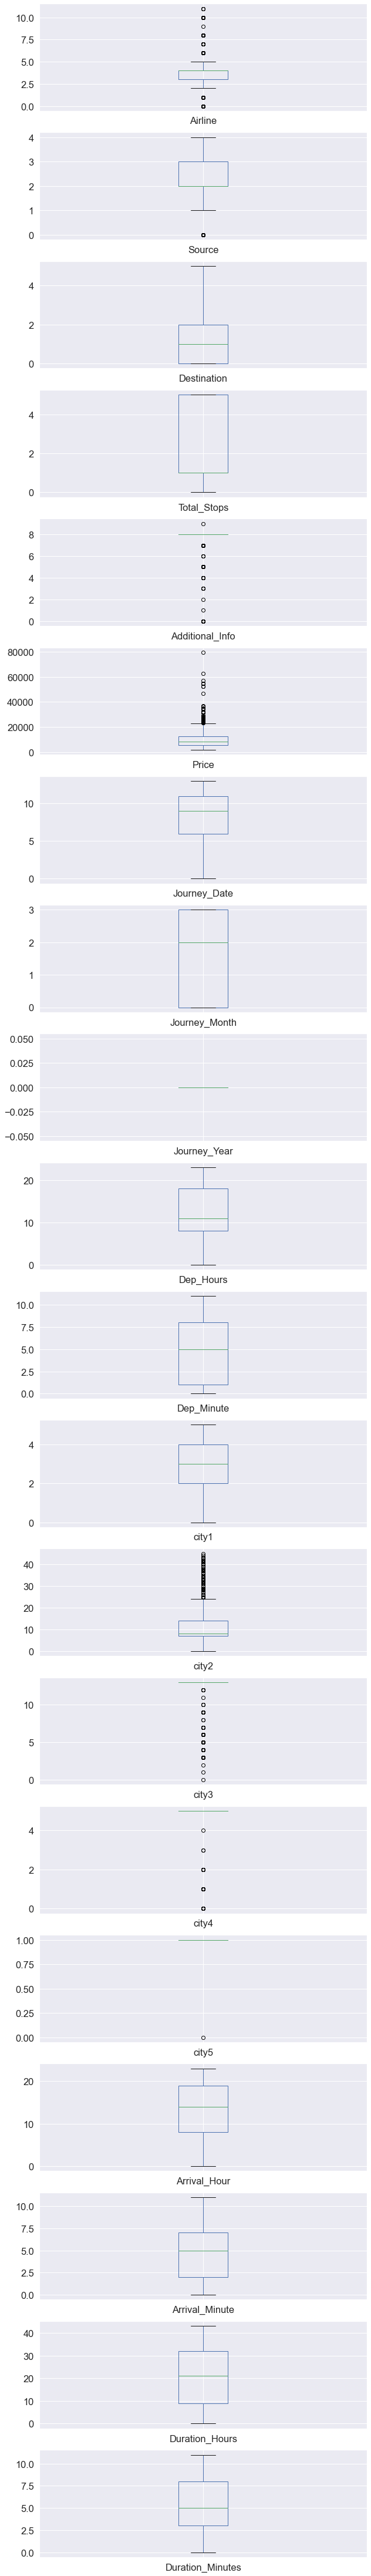

In [36]:
sns.set_theme(style='darkgrid',palette='deep',font_scale=1.5, color_codes=True)
trs.plot(kind='box',subplots=True, figsize=(10,80),layout=(20,1))

#### other than price other categorical data have no outliers price is target column no action to take on it

### checking for skewness

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
trs.skew()

Airline               0.731095
Source               -0.424054
Destination           1.244169
Total_Stops           0.631543
Additional_Info      -1.779838
Price                 1.812552
Journey_Date         -0.307459
Journey_Month        -0.387493
Journey_Year          0.000000
Dep_Hours             0.113073
Dep_Minute            0.167029
city1                -0.618762
city2                 1.426582
city3                -2.082590
city4               -16.012886
city5              -103.358599
Arrival_Hour         -0.369988
Arrival_Minute        0.110945
Duration_Hours        0.338322
Duration_Minutes      0.004741
dtype: float64

In [39]:
# city 4 and 5 have high skewness we are going to drop them
# Airline, Destination, Total Stops, Additional info, city 1,city 2 city 3 have skewness we will reduce it
trs.drop(['city4','city5'],axis=1,inplace=True)

In [40]:
# importing the required libraries
from scipy.stats import boxcox 
from sklearn.preprocessing import power_transform

In [41]:
# reduce skewness in train data
l=['Airline','Destination','Total_Stops','Additional_Info','city1','city2','city3']
for i in l:
    d1=np.array(trs[i])
    trs[i]=power_transform(d1.reshape(-1,1))

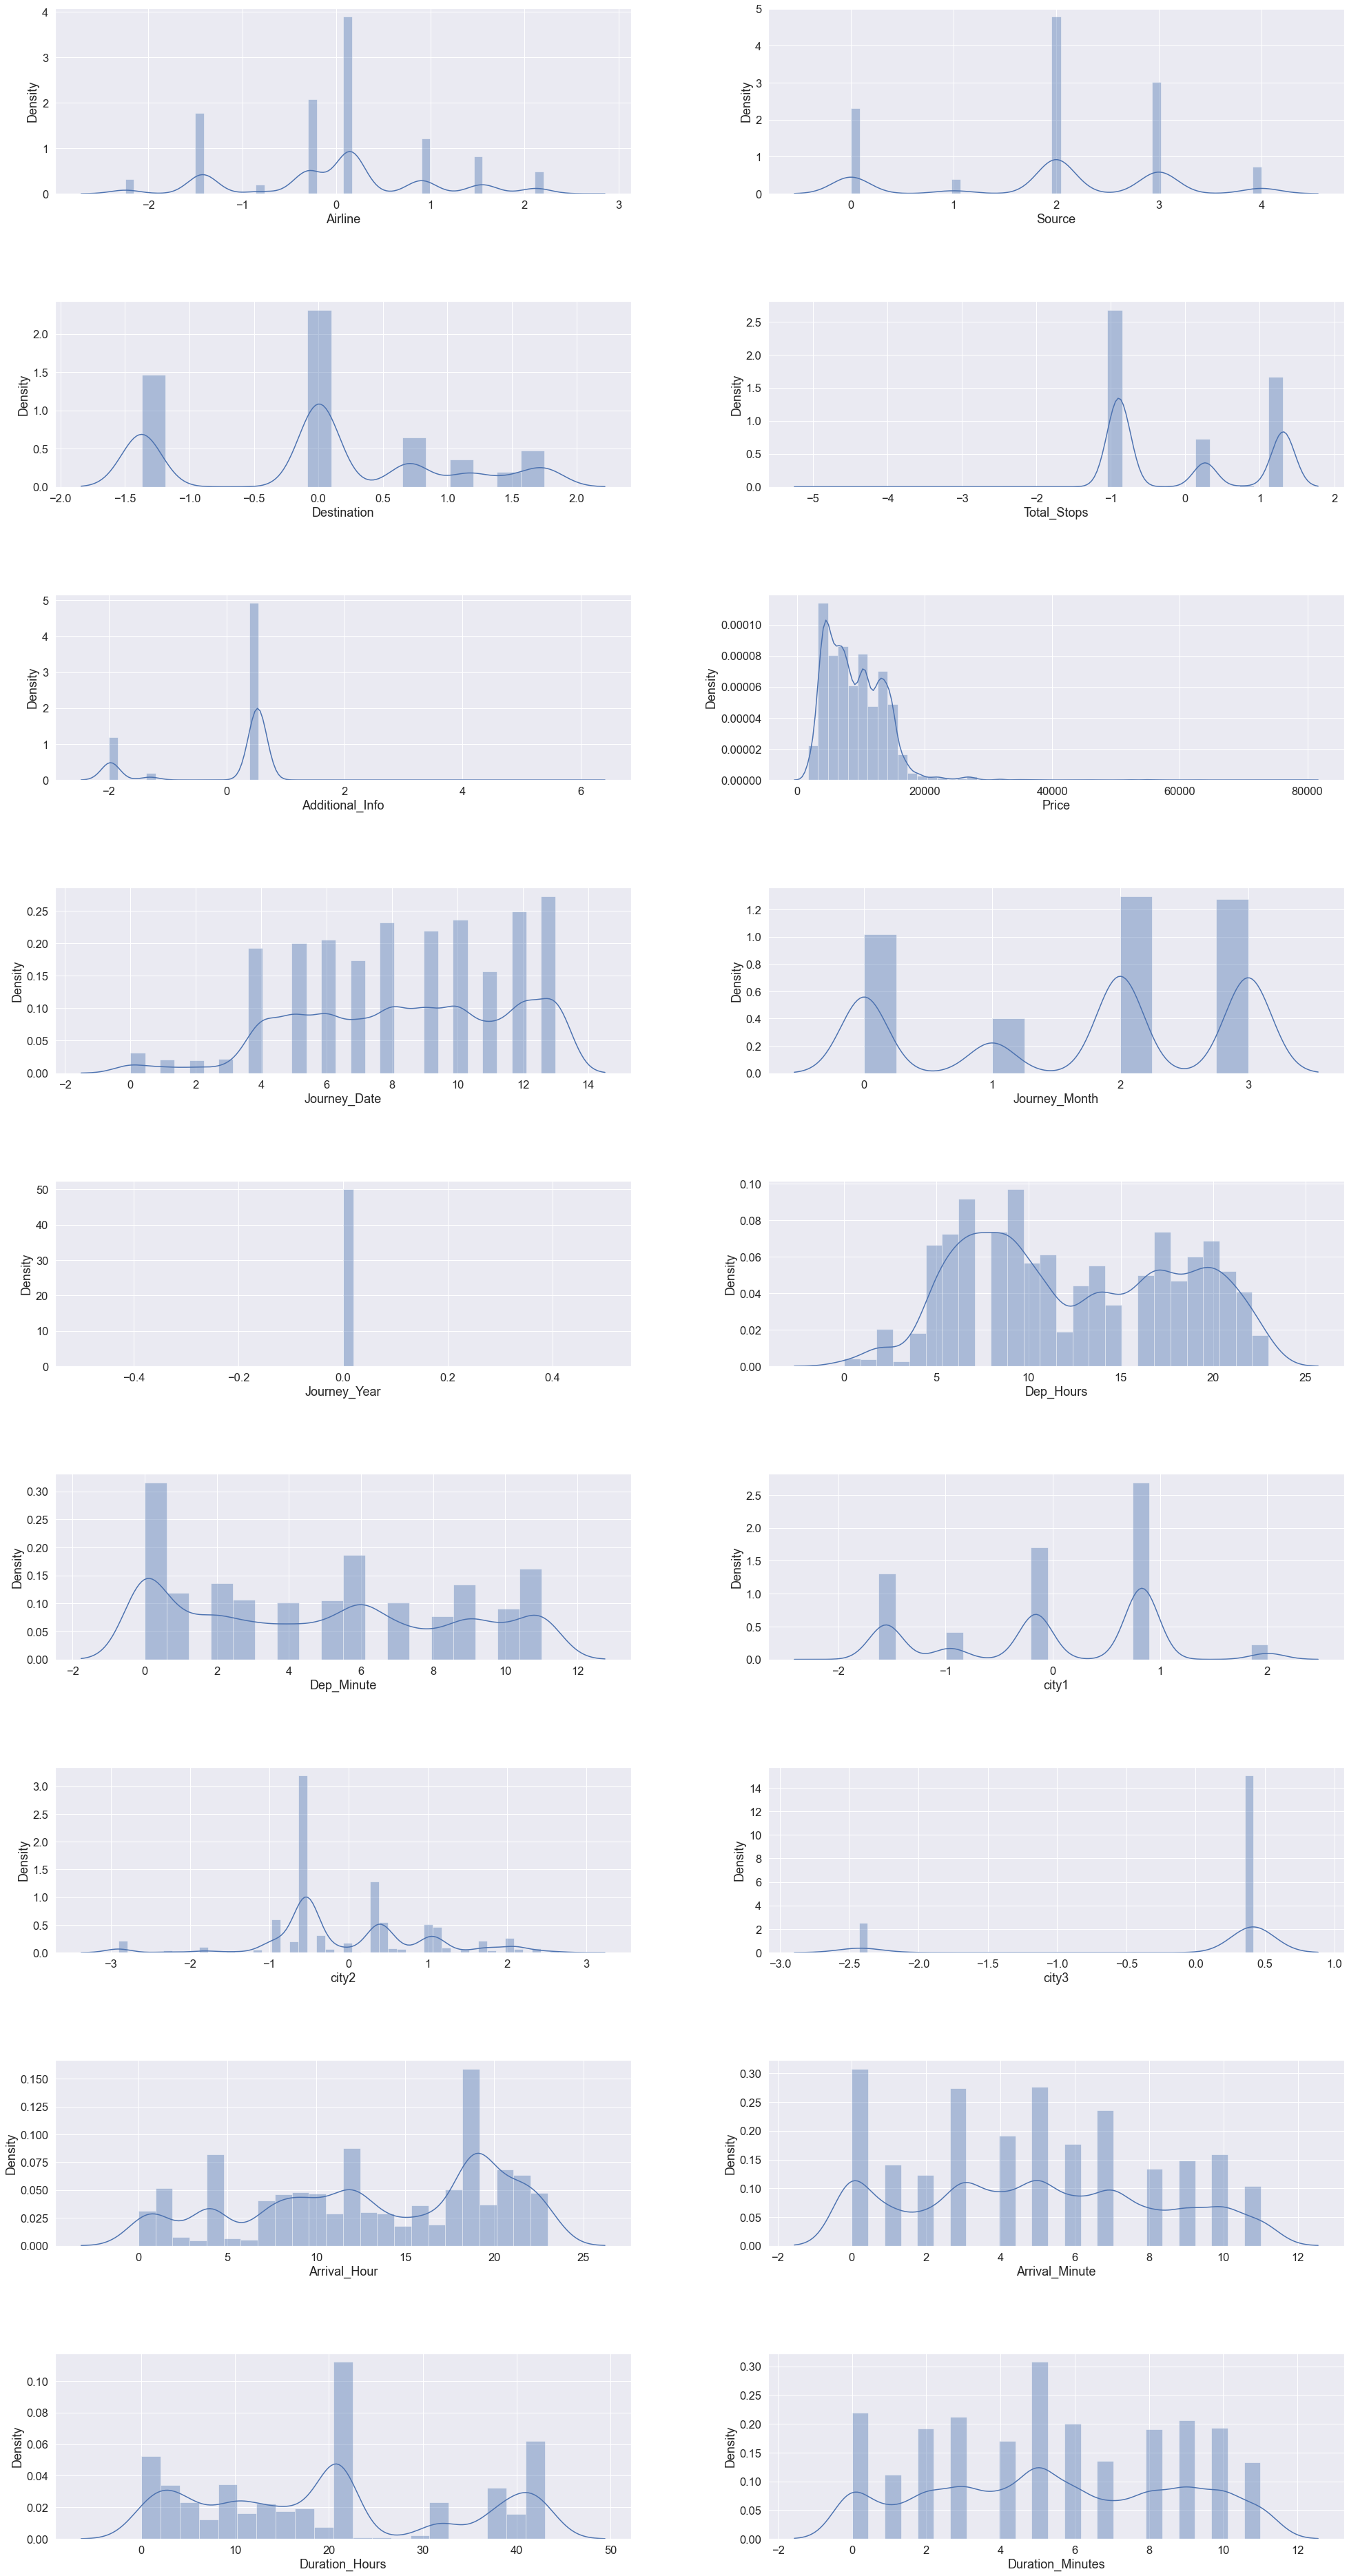

In [42]:
c=1
plt.figure(figsize=(30,60))
for i in trs.columns:
    plt.subplot(10,2,c)
    sns.distplot(trs[i])
    plt.tight_layout(pad=6.0)
    c=c+1
plt.show()

same to test data

In [43]:
tes.skew()

Airline              0.483882
Source              -0.424997
Destination          1.263630
Total_Stops          0.672623
Additional_Info     -1.719119
Journey_Date        -0.258730
Journey_Month       -0.403700
Journey_Year         0.000000
Dep_Hours            0.093759
Dep_Minute           0.128515
city1               -0.622460
city2                1.181986
city3               -2.113032
city4              -16.093694
city5              -51.681718
Arrival_Hour        -0.443166
Arrival_Minute       0.115267
Duration_Hours       0.212562
Duration_Minutes     0.011081
dtype: float64

In [44]:
# city 4 and 5 have high skewness we are going to drop them
# Airline, Destination, Total Stops, Additional info, city 1,city 2 city 3 have skewness we will reduce it
tes.drop(['city4','city5'],axis=1,inplace=True)

In [45]:
# reduce skewness in test data
l=['Airline','Destination','Total_Stops','Additional_Info','city1','city2','city3']
for i in l:
    d1=np.array(tes[i])
    tes[i]=power_transform(d1.reshape(-1,1))

In [46]:
trs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  float64
 1   Source            10683 non-null  int32  
 2   Destination       10683 non-null  float64
 3   Total_Stops       10683 non-null  float64
 4   Additional_Info   10683 non-null  float64
 5   Price             10683 non-null  int64  
 6   Journey_Date      10683 non-null  int32  
 7   Journey_Month     10683 non-null  int32  
 8   Journey_Year      10683 non-null  int32  
 9   Dep_Hours         10683 non-null  int32  
 10  Dep_Minute        10683 non-null  int32  
 11  city1             10683 non-null  float64
 12  city2             10683 non-null  float64
 13  city3             10683 non-null  float64
 14  Arrival_Hour      10683 non-null  int32  
 15  Arrival_Minute    10683 non-null  int32  
 16  Duration_Hours    10683 non-null  int32 

In [47]:
trs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  float64
 1   Source            10683 non-null  int32  
 2   Destination       10683 non-null  float64
 3   Total_Stops       10683 non-null  float64
 4   Additional_Info   10683 non-null  float64
 5   Price             10683 non-null  int64  
 6   Journey_Date      10683 non-null  int32  
 7   Journey_Month     10683 non-null  int32  
 8   Journey_Year      10683 non-null  int32  
 9   Dep_Hours         10683 non-null  int32  
 10  Dep_Minute        10683 non-null  int32  
 11  city1             10683 non-null  float64
 12  city2             10683 non-null  float64
 13  city3             10683 non-null  float64
 14  Arrival_Hour      10683 non-null  int32  
 15  Arrival_Minute    10683 non-null  int32  
 16  Duration_Hours    10683 non-null  int32 

In [48]:
# Splitting the data into future columns and target columns
x=trs.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17]]
y=trs.iloc[:,5]

### Scaling

In [49]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#minamx scaler reduce the value of data in between 0 and 1

In [50]:
#training data scaling
scale=StandardScaler()
for i in x:
    d=np.array(x[i])
    scale.fit(d.reshape(-1,1))
    scale.transform(d.reshape(-1,1))
    x[i]=d

In [51]:
# testing data scaling
scale=StandardScaler()
for i in tes:
    d=np.array(tes[i])
    scale.fit(d.reshape(-1,1))
    scale.transform(d.reshape(-1,1))
    tes[i]=d

In [52]:
x.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Dep_Hours,Dep_Minute,city1,city2,city3,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,-0.295500,0,1.752703,1.314489,0.524703,9,0,0,22,4,-1.554021,0.357673,0.414182,1,2,21,9
1,-1.420300,3,-1.370545,0.265844,0.524703,4,2,0,5,10,-0.157586,1.516072,-2.426307,13,3,41,4
2,0.147745,2,0.005861,0.265844,0.524703,13,3,0,9,5,0.831274,2.015656,-2.421196,4,5,9,0
3,-0.295500,3,-1.370545,-0.893445,0.524703,5,2,0,18,1,-0.157586,2.143911,0.414182,23,6,38,4
4,-0.295500,0,1.752703,-0.893445,0.524703,0,0,0,16,10,-1.554021,2.143911,0.414182,21,7,37,8


### Hyper perameter tuning
Hyper parameter tuning is nothing but the finding the correct parameters of a model so the model can perform at it highest performance state

In [53]:
# importing the required libraries
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [54]:
# for that we are going to import 
from sklearn.model_selection import GridSearchCV

In [258]:
rf, ab,dt,lr=RandomForestRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), LinearRegression()
#creating perameters
model_par={'DecisionTreeRegressor':{'model':dt,'param':{'criterion' : ["mse", "friedman_mse", "mae", "poisson"],'splitter':['best','random']}},
           'RandomForestRegressor':{'model':rf,'param':{'n_estimators':[100,120,150],'criterion':['mse', 'mae'],'max_features':['auto','sqrt','log2']}},
           'AdaBoostRegressor':{'model':ab,'param':{'loss':['linear', 'square', 'exponential']}},
           'LinearRegression':{'model':lr,'param':{'fit_intercept':[True],'normalize':[True]}}
          }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': 'DecisionTreeRegressor',
  'best_score': 0.9333952449669198,
  'best_params': {'criterion': 'mae', 'splitter': 'random'}},
 {'model': 'RandomForestRegressor',
  'best_score': 0.9527985342566975,
  'best_params': {'criterion': 'mse',
   'max_features': 'auto',
   'n_estimators': 100}},
 {'model': 'AdaBoostRegressor',
  'best_score': 0.27280495115240455,
  'best_params': {'loss': 'linear'}},
 {'model': 'LinearRegression',
  'best_score': 0.1090680513574348,
  'best_params': {'fit_intercept': True, 'normalize': True}}]

### model selection
From the above grid search cv we can clearly see that the random forest regressor performs best for this data set So we can use RandomForestRegressor()



In [73]:
rf=RandomForestRegressor(criterion='mae',max_features='auto',n_estimators=100)
r=DecisionTreeRegressor(criterion='mae',splitter='random')

model tuning

In [ ]:
I=[]
score=[]
ma=[]
ms=[]
r2=[]
cv=[]

for i in range(87,90):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=i)
        rf.fit(xtrain,ytrain)
        tr=rf.score(xtrain,ytrain)
        te=rf.score(xtest,ytest)
        pre=rf.predict(xtest)
        mar=mean_absolute_error(ytest,pre)
        mse=np.sqrt(mean_squared_error(ytest,pre))
        CV=cross_val_score(rf,x,y,cv=4).mean()*100
        r=r2_score(ytest,pre)
        I.append(i)
        score.append(te)
        ma.append(mar)
        ms.append(mse)
        r2.append(r)
        cv.append(CV)
values=pd.DataFrame({'accuracy':score,'r2_score':r2,'r_state':I,'error':ms,'CV_score':cv})
values.sort_values(by='accuracy', ascending=False, inplace=True,ignore_index=True)
print('at random state',round(values.loc[0][2],0),'the model having the highest accuracy of',round(values.loc[0][0]*100,2))
print('Mean Square Error Value',values.loc[0][3],'CV_Score',values.loc[0][4])

model validation

In [91]:
s=pd.read_csv('fsub.csv')
sub=pd.DataFrame(s)


In [137]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5,random_state=88)
rf.fit(xtrain,ytrain)
tr=rf.score(xtrain,ytrain)
pre=rf.predict(xtest)
mar=mean_absolute_error(ytest,pre)
mse=np.sqrt(mean_squared_error(ytest,pre))
CV=cross_val_score(rf,x,y,cv=4).mean()*100
print('accuracy score {0} mean absolute error {1} and cv score of {2}'.format(tr,mar,CV))

accuracy score 0.9951292677870024 mean absolute error 925.3490265818045 and cv score of 75.77170651106935


In [139]:
predicted=pd.DataFrame(pre,columns=['predicted_price'])
predicted

,predicted_price
0,4439.0
1,8479.0
2,6717.0
3,5403.0
4,8603.0
...,...
5337,5618.0
5338,11999.0
5339,5678.0
5340,6528.0


In [151]:
t=np.array(ytest)
t

array([3841, 9923, 6883, ..., 8040, 6528, 5752], dtype=int64)

In [152]:
testprice=pd.DataFrame(t)

In [153]:
compare=pd.concat([predicted,testprice],axis=1)

In [154]:
compare

,predicted_price,0
0,4439.0,3841
1,8479.0,9923
2,6717.0,6883
3,5403.0,5403
4,8603.0,8603
...,...,...
5337,5618.0,5618
5338,11999.0,11421
5339,5678.0,8040
5340,6528.0,6528


In [158]:
#feeding the test data
pr=rf.predict(tes)
predicted=pd.DataFrame(pr,columns=['test data predicted price'])

In [159]:
# predicted flight ticket prices for provided test data set
predicted

,test data predicted price
0,14714.0
1,5276.0
2,12898.0
3,13727.0
4,3383.0
...,...
2666,10203.0
2667,4148.0
2668,15764.0
2669,15809.0


In [161]:
### Model saving
import pickle
filename='flightprice.pkl'
pickle.dump(rf,open(filename,'wb'))